In [1]:
import sys; 
sys.path.insert(0, '/Users/erezcohen/larlite/UserDev/mySoftware/MySoftwarePackage/mac/'); 
from plot_tools import *;
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from matplotlib import ticker

# electron selection efficiency as a function of  calorimetry variables
using single-particle $e$- and $\pi$-gun simulations from build fb01759 and 419662c

In [2]:
main_data_path = '/Users/erezcohen/Desktop/data/EIC/ECCE/ElectronPionPID/EvalFiles/CSVfiles/';
e_color = 'k';
pi_color='royalblue';

In [14]:
e_data,pi_data = dict(),dict()
for filelabel,chainname in zip(['hcalin','hcalout','fhcal','femc','tracking'],
                               ['ntp_cluster','ntp_cluster','ntp_cluster','ntp_cluster','tracks']):
    e_data[filelabel] = pd.read_csv(main_data_path + 'singleElectron_'+filelabel+'_'+chainname+'.csv');
    pi_data[filelabel] = pd.read_csv(main_data_path + 'singlePion_'+filelabel+'_'+chainname+'.csv');
    print len(e_data[filelabel]),'electrons and',len(pi_data[filelabel]),'pions in',filelabel

267359 electrons and 677503 pions in hcalin
251642 electrons and 1293712 pions in hcalout
64433 electrons and 551465 pions in fhcal
386557 electrons and 840209 pions in femc
903000 electrons and 902000 pions in tracking


# Merge data frames - to combine data from the same run and event
Merge each dataset with tracking to get reconstructed momentum information

In [17]:
len(pi_data['tracking']),len(e_data['tracking'])
len(pi_data['hcalin']),len(e_data['hcalin'])

(677503, 267359)

In [19]:
elec_data,pion_data = dict(),dict()
for filelabel in ['hcalin','hcalout','fhcal','femc']:
    elec_data[filelabel] = pd.merge(e_data['tracking'], e_data[filelabel],
                                    on=['run','event'],
                                    suffixes=('_tracking','_hcalin'))

    pion_data[filelabel] = pd.merge(pi_data['tracking'], pi_data[filelabel],
                                    on=['run','event'],
                                    suffixes=('_tracking','_hcalin'))

    print 'done merging',filelabel,'with',filelabel,'data'

done merging hcalin with hcalin data
done merging hcalout with hcalout data
done merging fhcal with fhcal data
done merging femc with femc data


In [20]:
pion_data['hcalin'][0:3]

,run,event,trackID,charge,nhits,px,py,pz,pcax,pcay,...,dca2d,Unnamed: 12,clusterID,eta,x,y,z,e,phi,Unnamed: 9
0,2300000.0,3,-9999,-9999,-9999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.760728,-6.68546,136.0860,109.1160,0.063363,1.619880,NaN
1,2300000.0,5,0,1,0,1.877350,0.452181,-14.15120,-0.001482,0.024268,...,-0.023976,NaN,0,0.793013,128.28500,-45.9012,123.7170,0.025345,-0.343612,NaN
2,2300000.0,6,0,1,0,0.019906,0.104273,-1.07919,0.007113,-0.003210,...,0.000052,NaN,0,-0.214771,-123.16900,58.2544,-33.6382,0.069699,2.699810,NaN


## define desired variables
cluster transverse distance from center

In [22]:
for filelabel in ['femc','hcalin','hcalout','fhcal']:
    elec_data[filelabel]['rho']  = np.sqrt( np.square(elec_data[filelabel]['x']) 
                                           + np.square(elec_data[filelabel]['y']) )
    pion_data[filelabel]['rho'] = np.sqrt( np.square(pion_data[filelabel]['x']) 
                                          + np.square(pion_data[filelabel]['y']) )
    elec_data[filelabel]['p']  = np.sqrt( np.square(elec_data[filelabel]['px'])                                            
                                         + np.square(elec_data[filelabel]['py'])                                          
                                         + np.square(elec_data[filelabel]['pz']))
    pion_data[filelabel]['p'] = np.sqrt( np.square(pion_data[filelabel]['px'])                                            
                                         + np.square(pion_data[filelabel]['py'])                                          
                                         + np.square(pion_data[filelabel]['pz']))
    elec_data[filelabel]['E/p'] = elec_data[filelabel]['e']/elec_data[filelabel]['p']
    pion_data[filelabel]['E/p'] = pion_data[filelabel]['e']/pion_data[filelabel]['p']    

# "hot-spot" behavior in cluster position in the calorimeters
This is because a reconstructed cluster position is assigned to a block in discrete locations

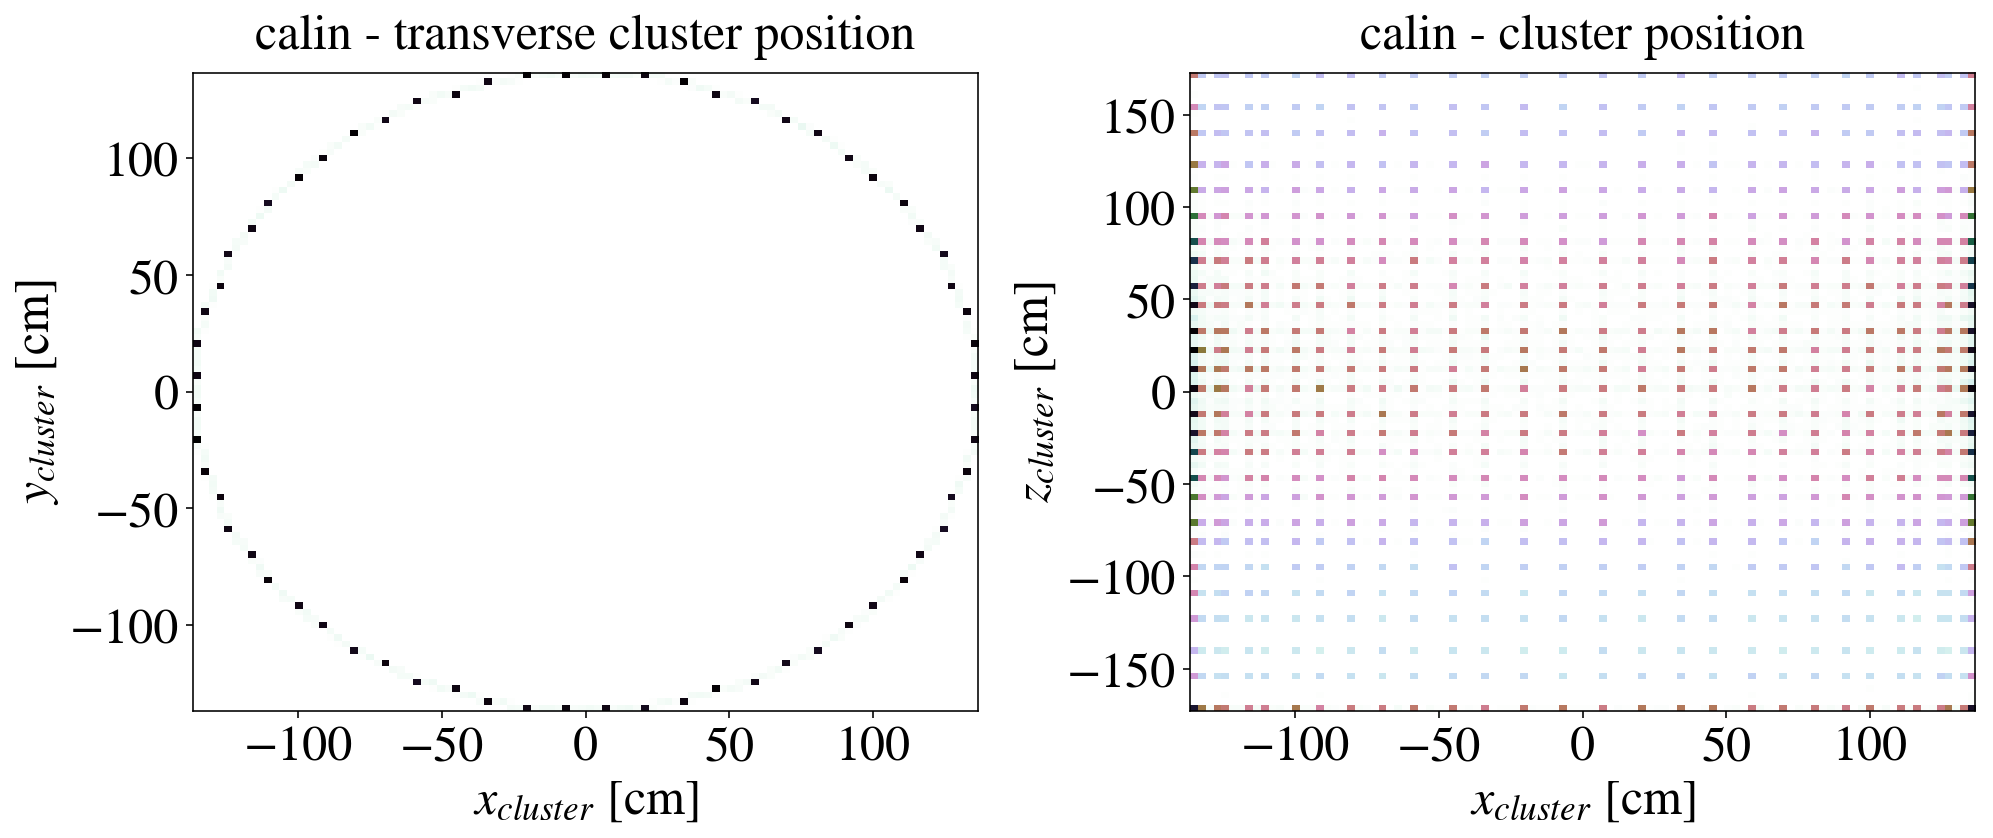

In [23]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(elec_data['hcalin']['x'],elec_data['hcalin']['y'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',title='calin - transverse cluster position',do_add_legend=False)

ax = fig.add_subplot(1,2,2)
plt.hist2d(elec_data['hcalin']['x'],elec_data['hcalin']['z'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',title='calin - cluster position',do_add_legend=False)

plt.tight_layout();

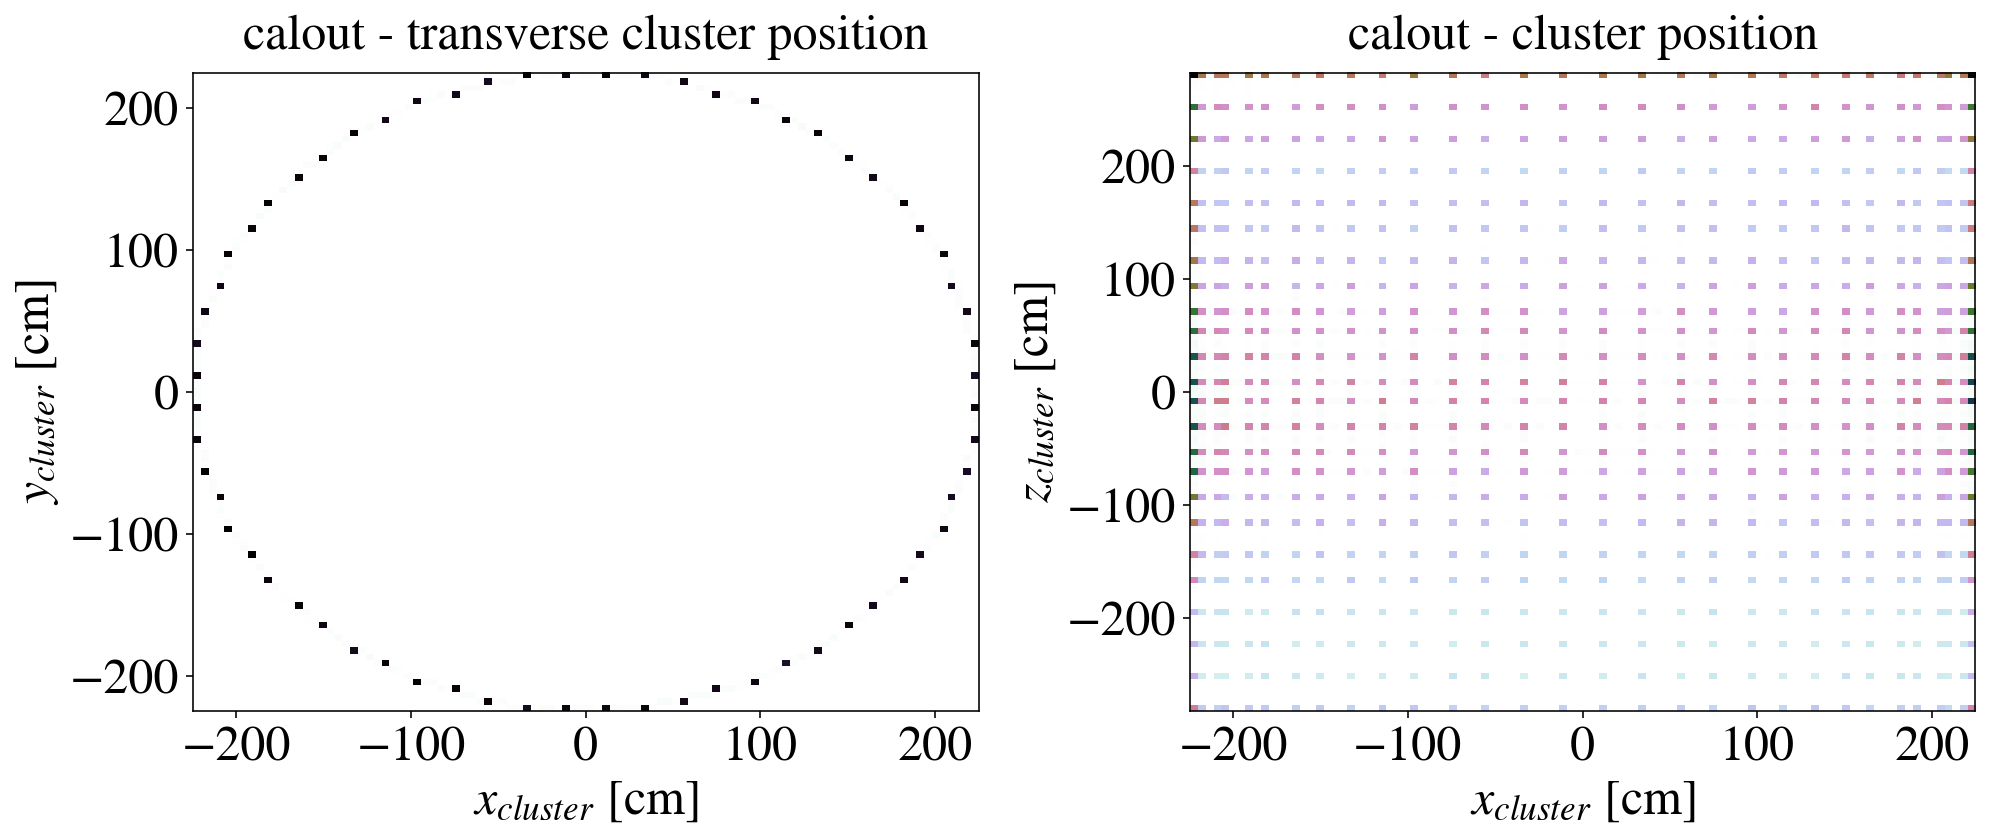

In [24]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(elec_data['hcalout']['x'],elec_data['hcalout']['y'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',
         title='calout - transverse cluster position',do_add_legend=False,
         xticks=(-200,-100,0,100,200),
         yticks=(-200,-100,0,100,200))

ax = fig.add_subplot(1,2,2)
plt.hist2d(elec_data['hcalout']['x'],elec_data['hcalout']['z'],bins=100,cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',
         title='calout - cluster position',do_add_legend=False,
         xticks=(-200,-100,0,100,200))

plt.tight_layout();

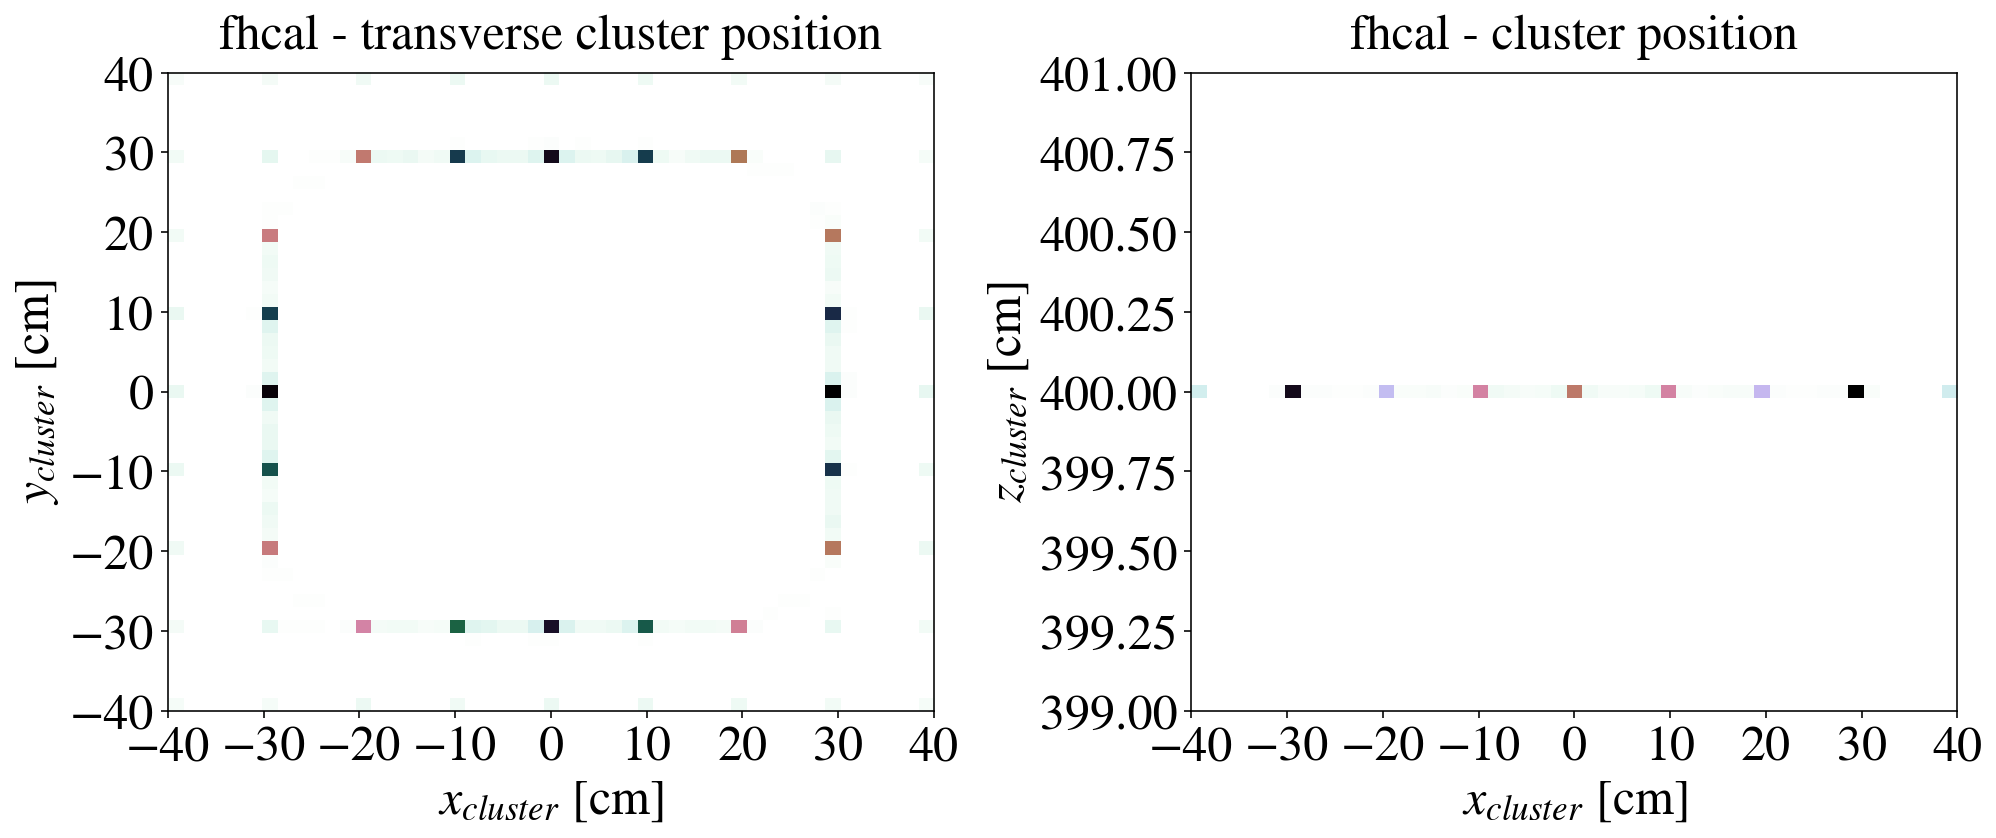

In [25]:
fig=plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,2,1)
plt.hist2d(elec_data['fhcal']['x'],elec_data['fhcal']['y'],
           bins=(np.linspace(-40,40,50),np.linspace(-40,40,50)),
           cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$y_{cluster}$ [cm]',
         title='fhcal - transverse cluster position',do_add_legend=False,
        )

ax = fig.add_subplot(1,2,2)
plt.hist2d(elec_data['fhcal']['x'],elec_data['fhcal']['z'],
           bins=(np.linspace(-40,40,50),np.linspace(399,401,50)),
           cmap='cubehelix_r')
set_axes(ax,'$x_{cluster}$ [cm]','$z_{cluster}$ [cm]',
         title='fhcal - cluster position',do_add_legend=False,
        )

plt.tight_layout();

In [217]:
# e_arr  = np.abs(e_data['hcalin']['z']);

# bins=np.linspace(0,300,121)
# fig,ax=plt.subplots()
# ax.hist( e_arr, bins=bins  , linewidth = 2 , label='ax.hist', density=True)

# e_hist,edges  = np.histogram( e_arr,  bins=bins, density=True )
# x = (edges[1:]+edges[:-1])/2    
# ax.step( x, e_hist, where='mid', linewidth = 2 , label='np.histogram')
# set_axes(ax,'','',do_add_legend=True)

# Now, look at 1D distribution
and apply selection cuts to check the impact on electorn and pion event selection

In [26]:
def Plot_e_and_pi_distribtions(chainname='hcalin',chainlabel='calin',
                               variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                               bins=np.linspace(0,2.,51),
                               ax=None, xticks=None, 
                               ylabel='Frequency [a.u.]', 
                               do_add_legend=True, yscale='log', fontsize=18,xlim=None):
    
    if ax is None: fig,ax = plt.subplots(figsize=(9,6))
    if '|' in variable: # take absolute value, e.g. |z|
        e_arr  = np.abs(elec_data[chainname][variable[1:-1]]);
        pi_arr = np.abs(pion_data[chainname][variable[1:-1]]);        
        varlabel = '|' + varlabel + '|';
    else:
        e_arr  = elec_data[chainname][variable];
        pi_arr = pion_data[chainname][variable];

    e_hist,edges  = np.histogram( e_arr,  bins=bins, density=True )
    pi_hist,edges = np.histogram( pi_arr, bins=bins, density=True )
    x = (edges[1:]+edges[:-1])/2
    
    ax.step( x, e_hist, color=e_color  , where='mid', linewidth = 2 , label='$e$')#, label='$e$, %.1fM evnets'%(len(e_data[chainname])*1e-6));
    ax.step( x, pi_hist, color=pi_color, where='mid', linewidth = 2 , label='$\pi$')#, label='$\pi$, %.1fM evnets'%(len(pi_data[chainname])*1e-6));
    
    set_axes(ax,
             varlabel + ' ' + varunits,ylabel,
             title = varlabel + ' in ' + chainlabel,
             do_add_grid=True,xticks=xticks, do_add_legend=do_add_legend,
             fontsize=fontsize,xlim=xlim)
    ax.set_yscale(yscale)
    plt.tight_layout()
    
    
    
def get_cut_efficiency(x, min_or_max, x_cut):
    '''
    compute selection efficiency of a given (min/max) 1D cut on x
    Uncertainty estimated assuming Poissonian uncertainty
    and bound from below by 0, and from above by eff_max=1
    
    input
    --------
    min_or_max     'min' / 'max'
    
    return
    --------
    eff, eff_err_dw, eff_err_up
    
    '''
    
    if min_or_max=='min':   N_in_cut= float(len( x [x_cut < x]));
    elif min_or_max=='max': N_in_cut= float(len( x [x < x_cut]));
        
    N_tot      = float(len(x))
    eff        = N_in_cut/N_tot
    
    if N_in_cut:  
        eff_err= eff * np.sqrt( 1./N_in_cut + 1./N_tot ) 
    else:
        eff_err= 1./N_tot
        
    eff_err_dw = eff_err;
    eff_err_up = eff_err;
    
    if eff_err_dw > eff_err:   eff_err_dw = eff_err;
    if eff_err_up > 1-eff_err: eff_err_up = 1.-eff_err;
        
    return eff, eff_err_dw, eff_err_up
    
def Plot_e_and_pi_1D_cut_impact(chainname='hcalin',chainlabel='calin',
                                variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                                min_or_max='min',
                                cut_values=np.linspace(0,2.,10),
                                ax=None, xticks=None, 
                                ylabel='Selection efficiency', 
                                do_add_legend=True, yscale='linear', fontsize=18,xlim=None,ylim=None):
    
    if ax is None: fig,ax = plt.subplots(figsize=(9,6))

    if '|' in variable:
        e_arr  = np.abs(elec_data[chainname][variable[1:-1]]);
        pi_arr = np.abs(pion_data[chainname][variable[1:-1]]);        
        varlabel = '|' + varlabel + '|';
    else:
        e_arr  = elec_data[chainname][variable];
        pi_arr = pion_data[chainname][variable];
        
    e_eff,  e_eff_err_dw,  e_eff_err_up  = [],[],[]
    pi_eff, pi_eff_err_dw, pi_eff_err_up = [],[],[]
    
    for cut_value in cut_values:#{
        e_eff_in_cut, e_eff_in_cut_err_dw, e_eff_in_cut_err_up    = get_cut_efficiency(e_arr , min_or_max, cut_value)
        pi_eff_in_cut, pi_eff_in_cut_err_dw, pi_eff_in_cut_err_up = get_cut_efficiency(pi_arr, min_or_max, cut_value)
        
        e_eff        .append( e_eff_in_cut         )
        e_eff_err_dw .append( e_eff_in_cut_err_dw  )
        e_eff_err_up .append( e_eff_in_cut_err_up  )

        pi_eff       .append( pi_eff_in_cut        )
        pi_eff_err_dw.append( pi_eff_in_cut_err_dw )
        pi_eff_err_up.append( pi_eff_in_cut_err_up )
    #}
    e_eff,  e_eff_err_dw,  e_eff_err_up  = np.array(e_eff),  np.array( e_eff_err_dw),  np.array( e_eff_err_up)
    pi_eff, pi_eff_err_dw, pi_eff_err_up = np.array(pi_eff), np.array( pi_eff_err_dw), np.array( pi_eff_err_up)
    
    ax.errorbar( cut_values, e_eff, [e_eff_err_dw,e_eff_err_up], marker='o',color=e_color,
                markeredgewidth = 0.2,
                markeredgecolor='k', capsize=3, capthick=3, linestyle = 'None', label='$e$ selection efficiency');
    ax.fill_between( cut_values, e_eff - e_eff_err_dw, e_eff + e_eff_err_up , color=e_color, alpha=0.1)
    ax.errorbar( cut_values, pi_eff, [pi_eff_err_dw,pi_eff_err_up], marker='o',color=pi_color,
                markeredgewidth = 0.2,
                markeredgecolor='k', capsize=3, capthick=3, linestyle = 'None', label='$\pi$ selection efficiency');
    ax.fill_between( cut_values, pi_eff - pi_eff_err_dw, pi_eff + pi_eff_err_up , color=pi_color, alpha=0.1)


    set_axes(ax,min_or_max + ' ' + varlabel + ' ' + varunits,
             ylabel,
             title = 'cut on ' + min_or_max + ' ' + varlabel + ' in ' + chainlabel,
             do_add_grid = True,
             xticks=xticks, do_add_legend=do_add_legend,
             fontsize=fontsize,xlim=xlim,ylim=ylim)
    ax.set_yscale(yscale)    
    plt.tight_layout()    
    
    
    
def plot_1D_variable_and_cut(chainname='hcalin',chainlabel='calin',
                               variable='e',varlabel='$\Delta E_{dep}$',varunits='[GeV]',
                               bins=np.linspace(0,2.,51),
                               xticks=None, min_or_max='min',
                                cut_values=np.linspace(0,2.,10),
                               do_add_legend=True, yscale='log', fontsize=18,xlim=None,ylim=None,
                             figsize=(14,6)):
    
    figure = plt.figure(figsize=figsize)
    ax = figure.add_subplot(1,2,1);
    Plot_e_and_pi_distribtions(chainname=chainname,chainlabel=chainlabel,
                               variable=variable,varlabel=varlabel,varunits=varunits,
                               bins=bins,
                               ax=ax, xticks=xticks, 
                               ylabel='Frequency [a.u.]', 
                               do_add_legend=True, yscale='log', fontsize=fontsize,xlim=xlim)

    ax = figure.add_subplot(1,2,2)
    Plot_e_and_pi_1D_cut_impact(chainname=chainname,chainlabel=chainlabel,
                                variable=variable,varlabel=varlabel,varunits=varunits,
                                min_or_max=min_or_max,
                                cut_values=cut_values,
                                ax=ax, xticks=xticks, 
                                ylabel='Selection efficiency', 
                                do_add_legend=True, yscale='linear', fontsize=fontsize,
                                xlim=(np.min(cut_values)-0.1,np.max(cut_values)),
                                ylim=ylim)
    plt.tight_layout()

# calin

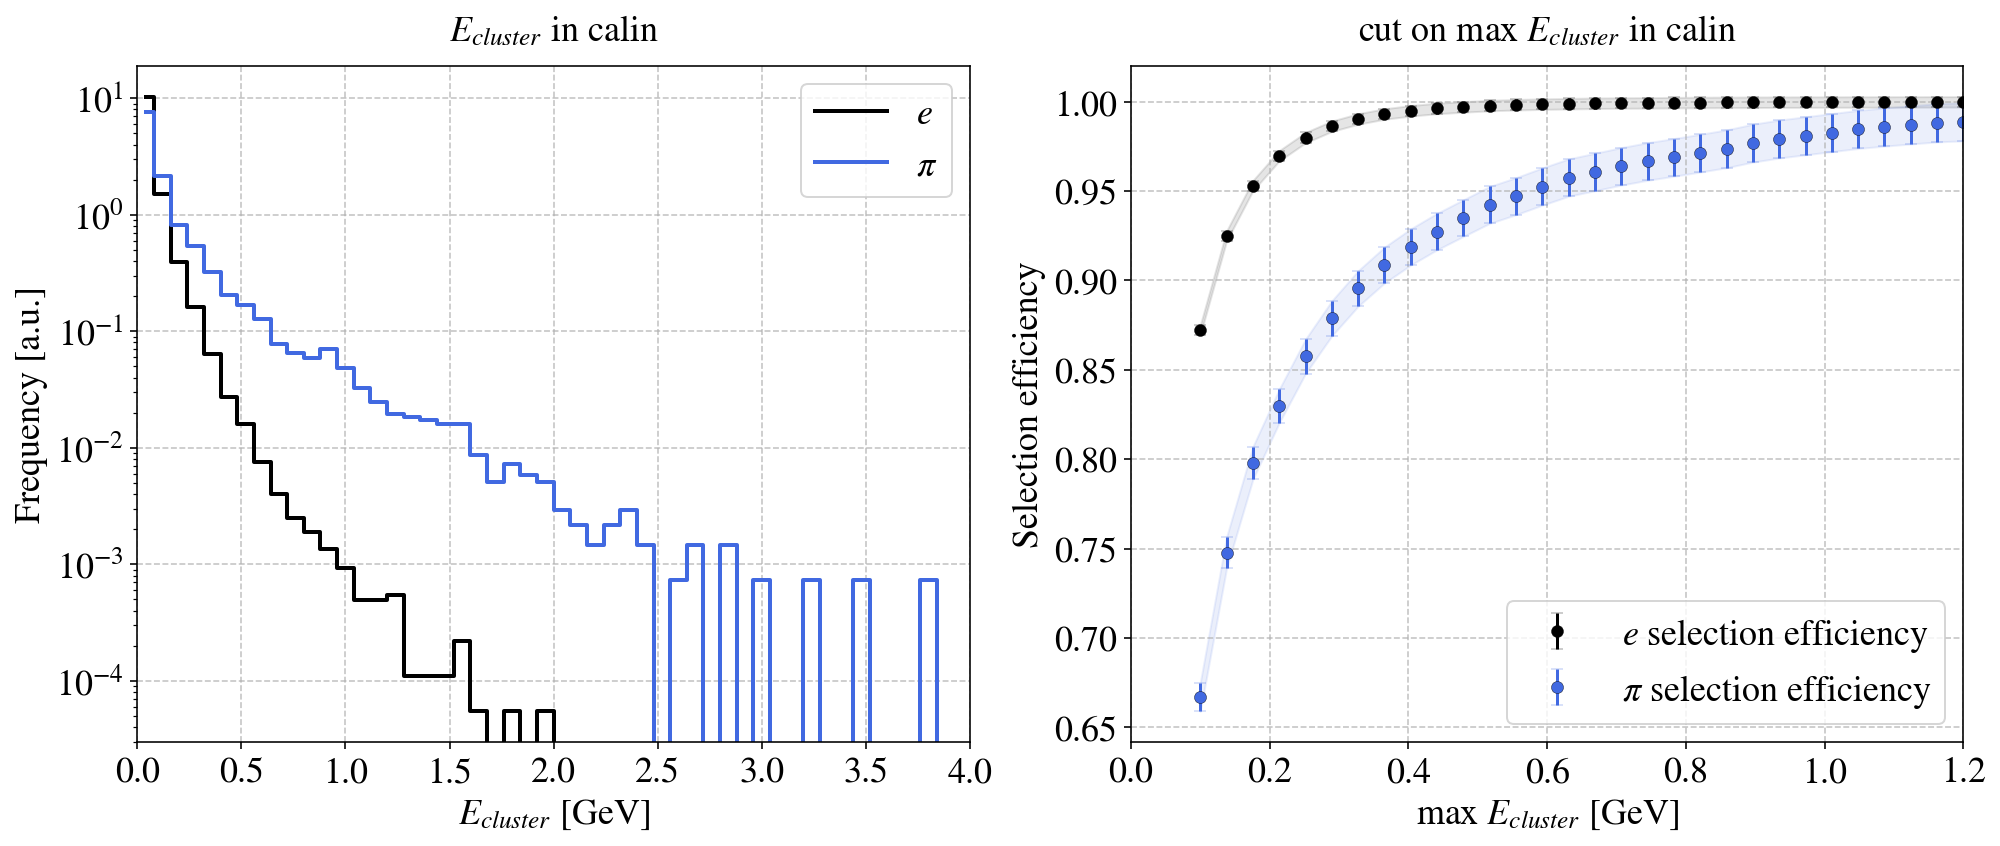

In [27]:
plot_1D_variable_and_cut(variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,4.,51),xlim=(0,4),
                         cut_values=np.linspace(0.1,1.2,30),min_or_max='max')

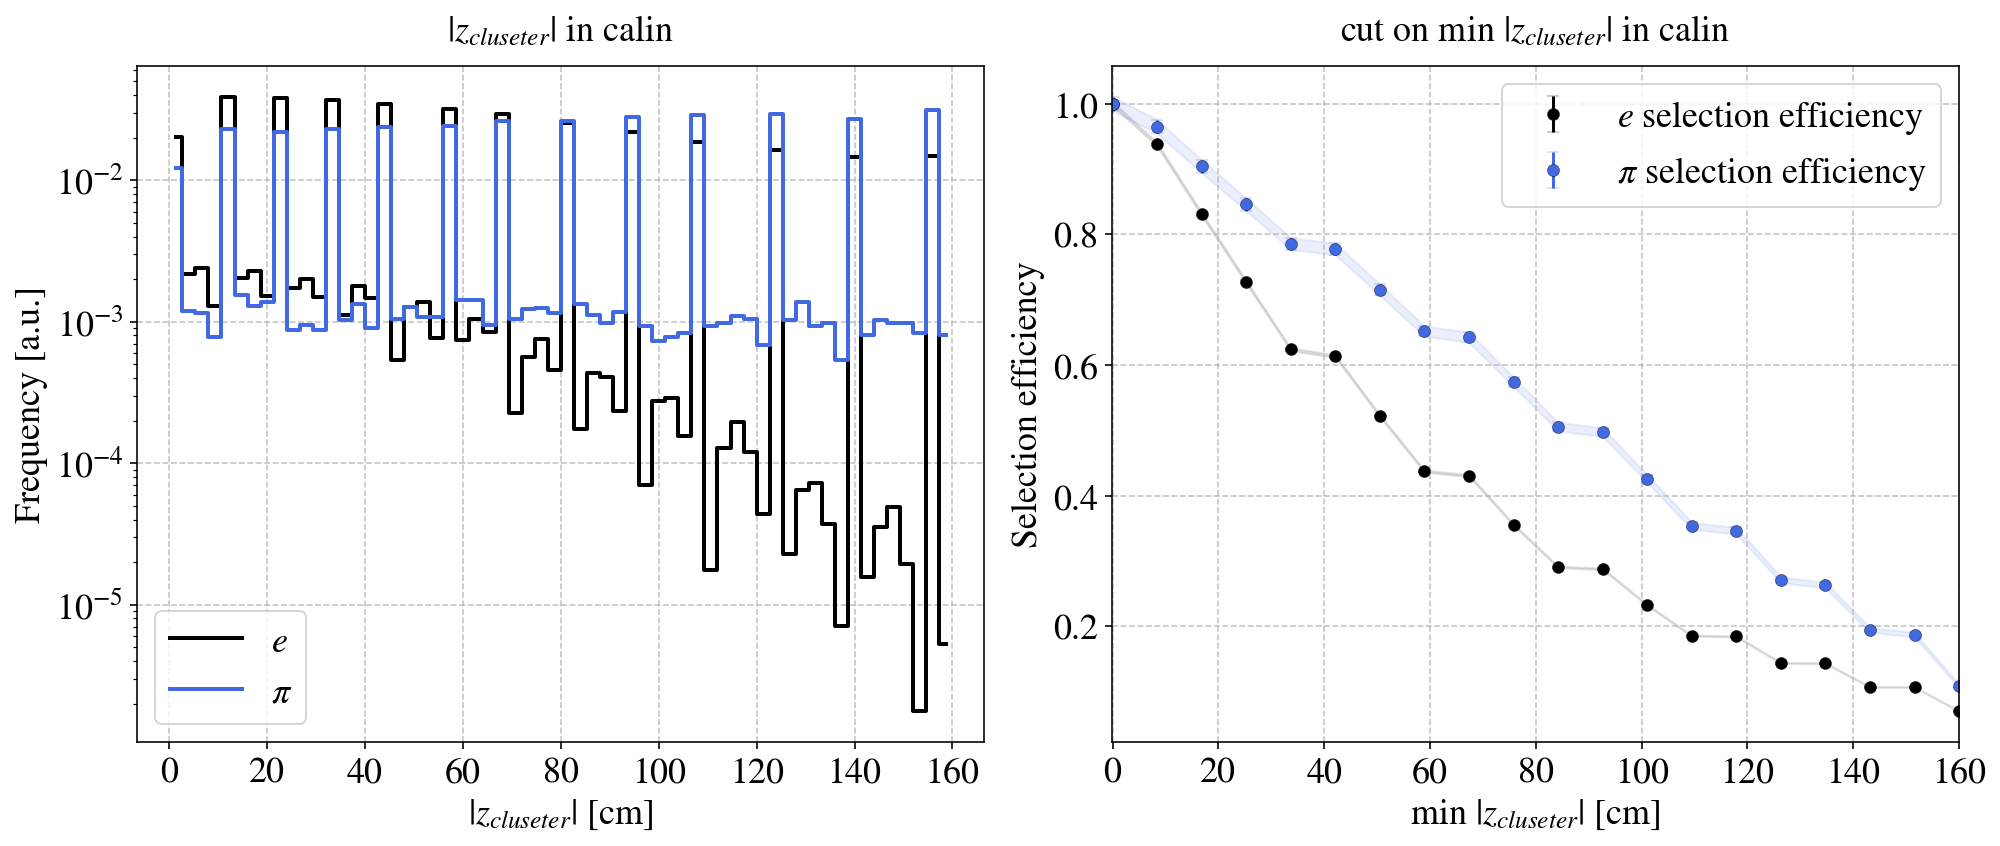

In [28]:
plot_1D_variable_and_cut(chainname='hcalin',chainlabel='calin',
                         variable='|z|',varlabel='$z_{cluseter}$',varunits='[cm]',
                         bins=np.linspace(0,160,61),
                         cut_values=np.linspace(0.,160,20),min_or_max='min')

# calout

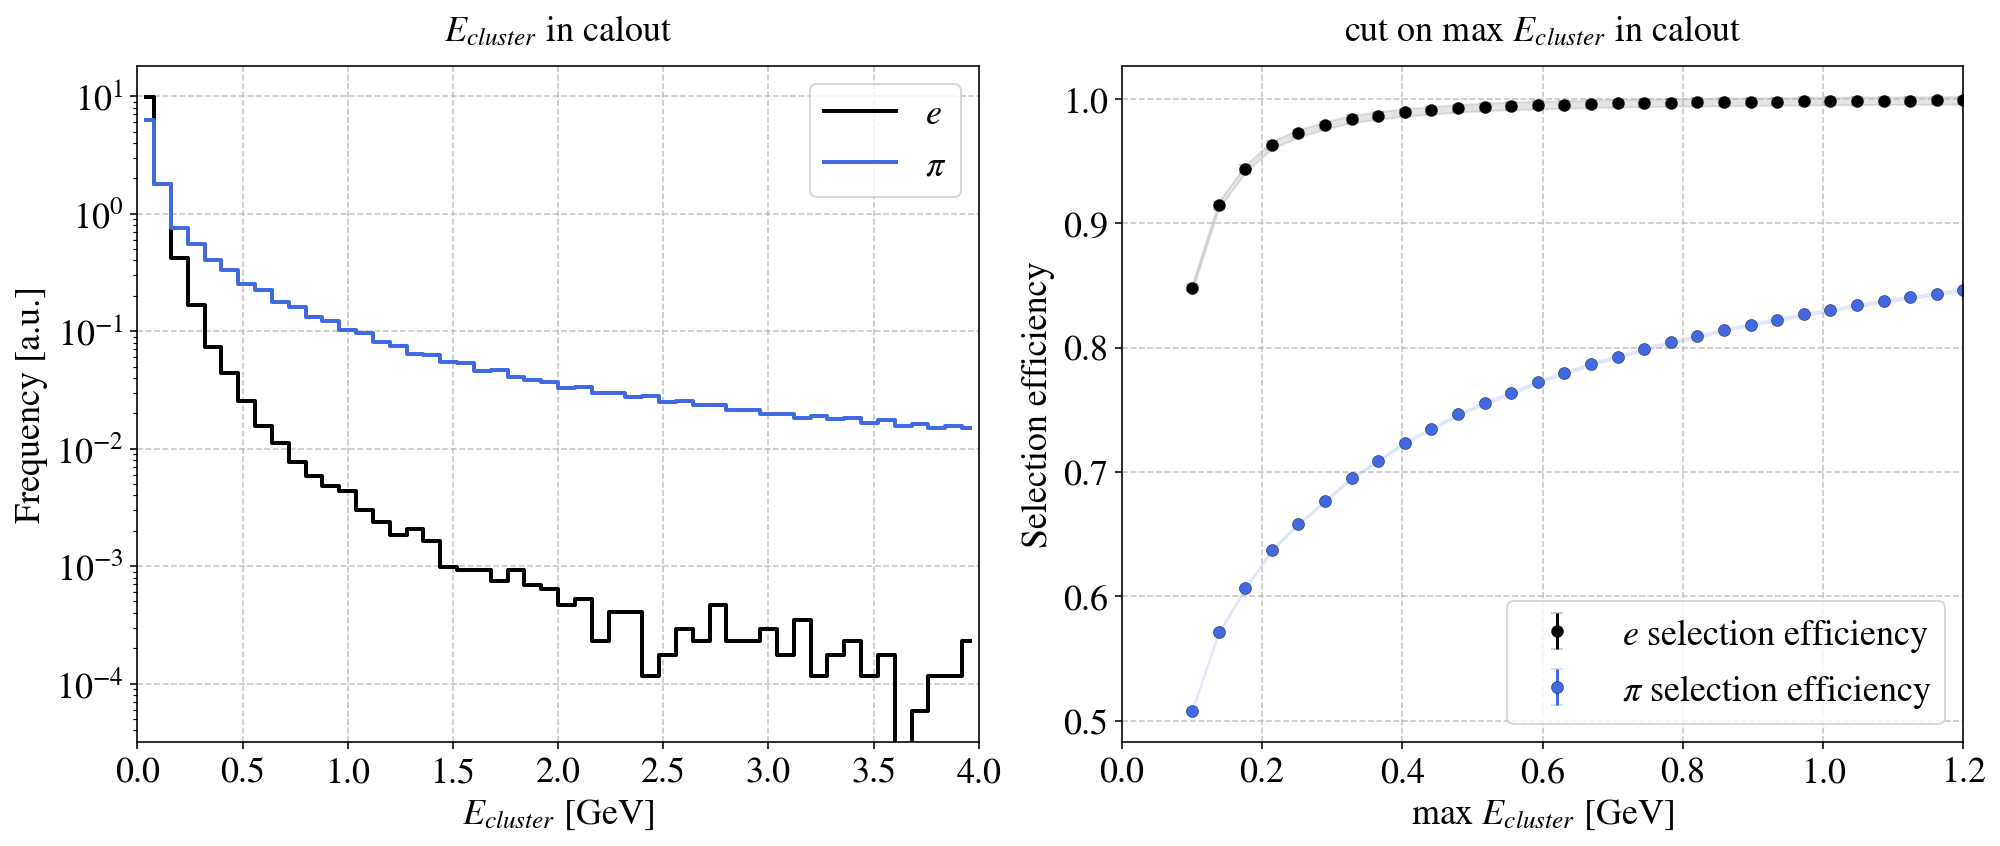

In [29]:
plot_1D_variable_and_cut(chainname='hcalout',chainlabel='calout',
                         variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,4.,51),xlim=(0,4),cut_values=np.linspace(0.1,1.2,30),
                         min_or_max='max')

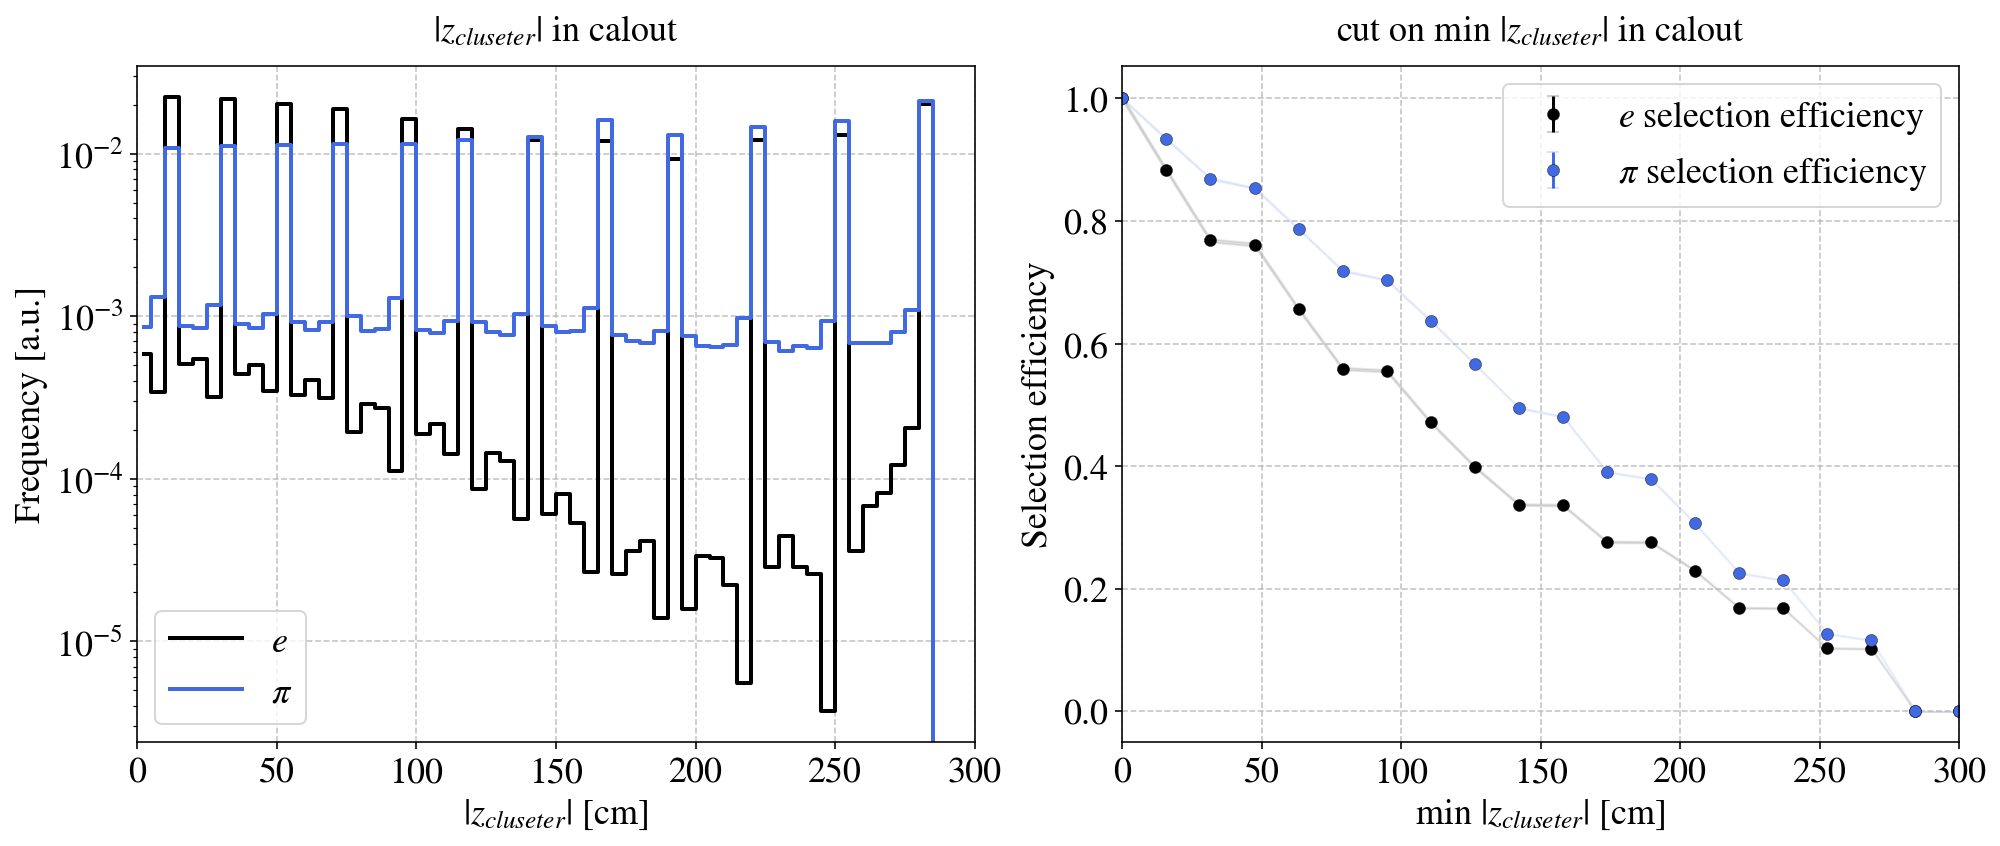

In [30]:
plot_1D_variable_and_cut(chainname='hcalout',chainlabel='calout',
                         variable='|z|',varlabel='$z_{cluseter}$',varunits='[cm]',
                         bins=np.linspace(0,300,61),xlim=(0,300),
                         cut_values=np.linspace(0.,300,20),min_or_max='min')

# fhcal

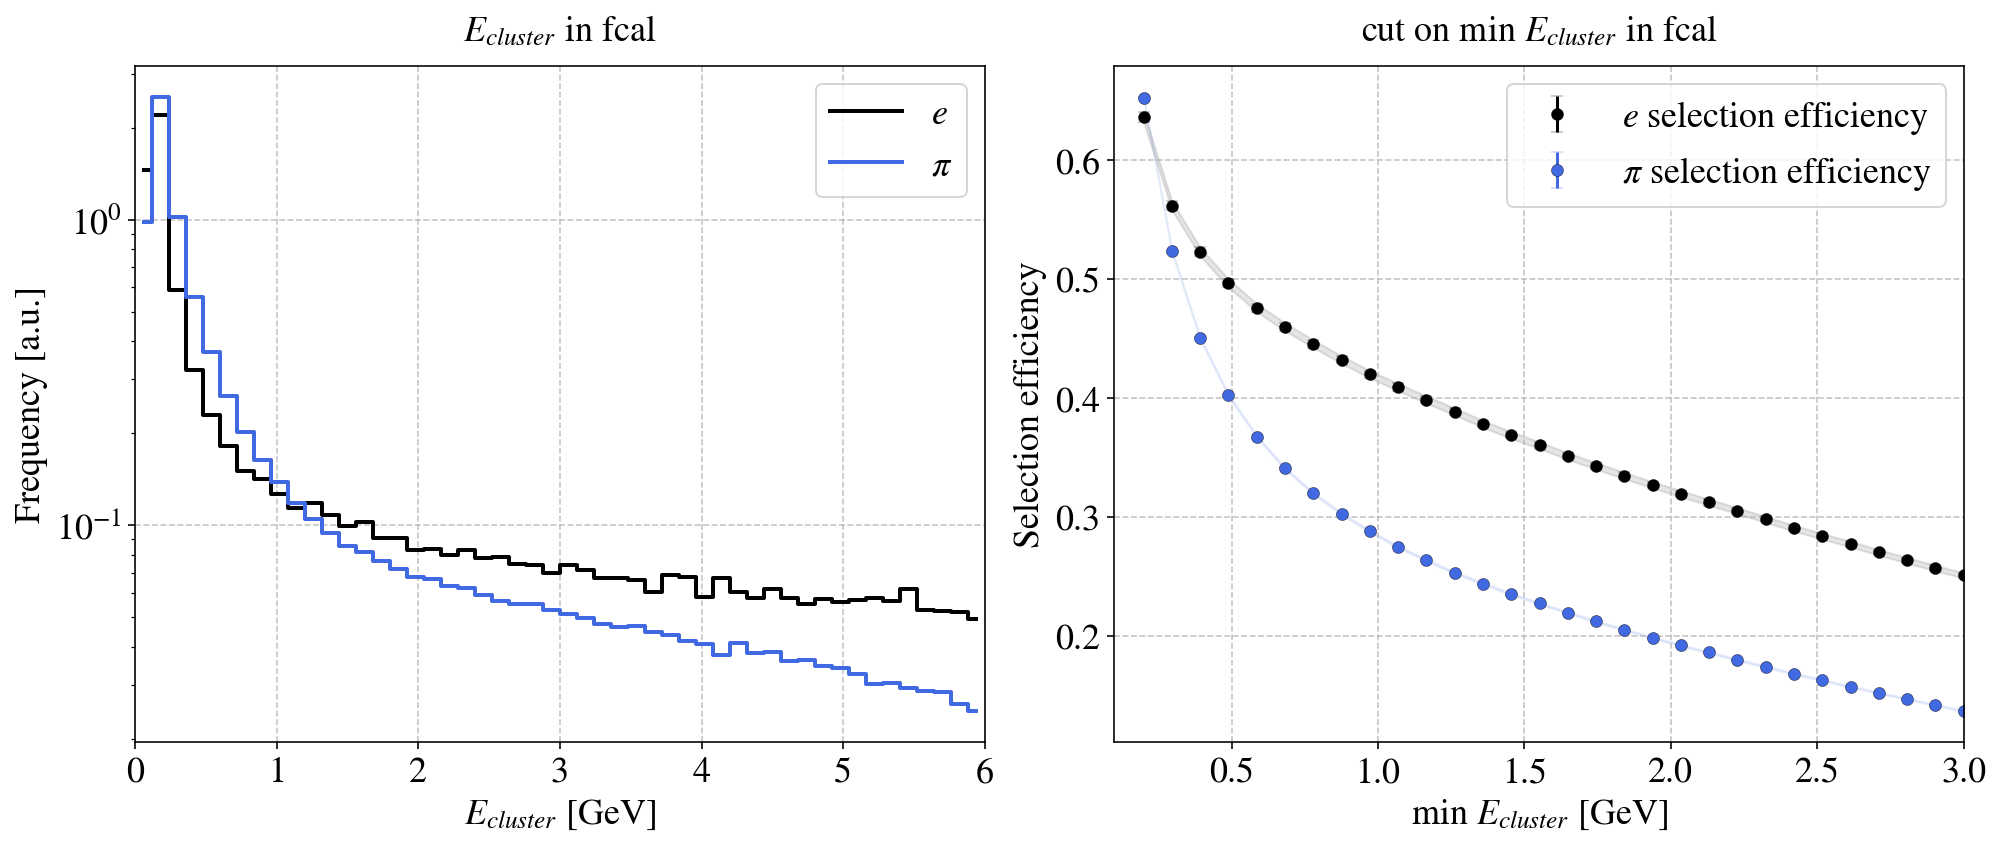

In [31]:
plot_1D_variable_and_cut(chainname='fhcal',chainlabel='fcal',
                         variable='e',varlabel='$E_{cluster}$',varunits='[GeV]',
                         bins=np.linspace(0,6,51),xlim=(0,6),
                         cut_values=np.linspace(0.2,3.,30),min_or_max='min')

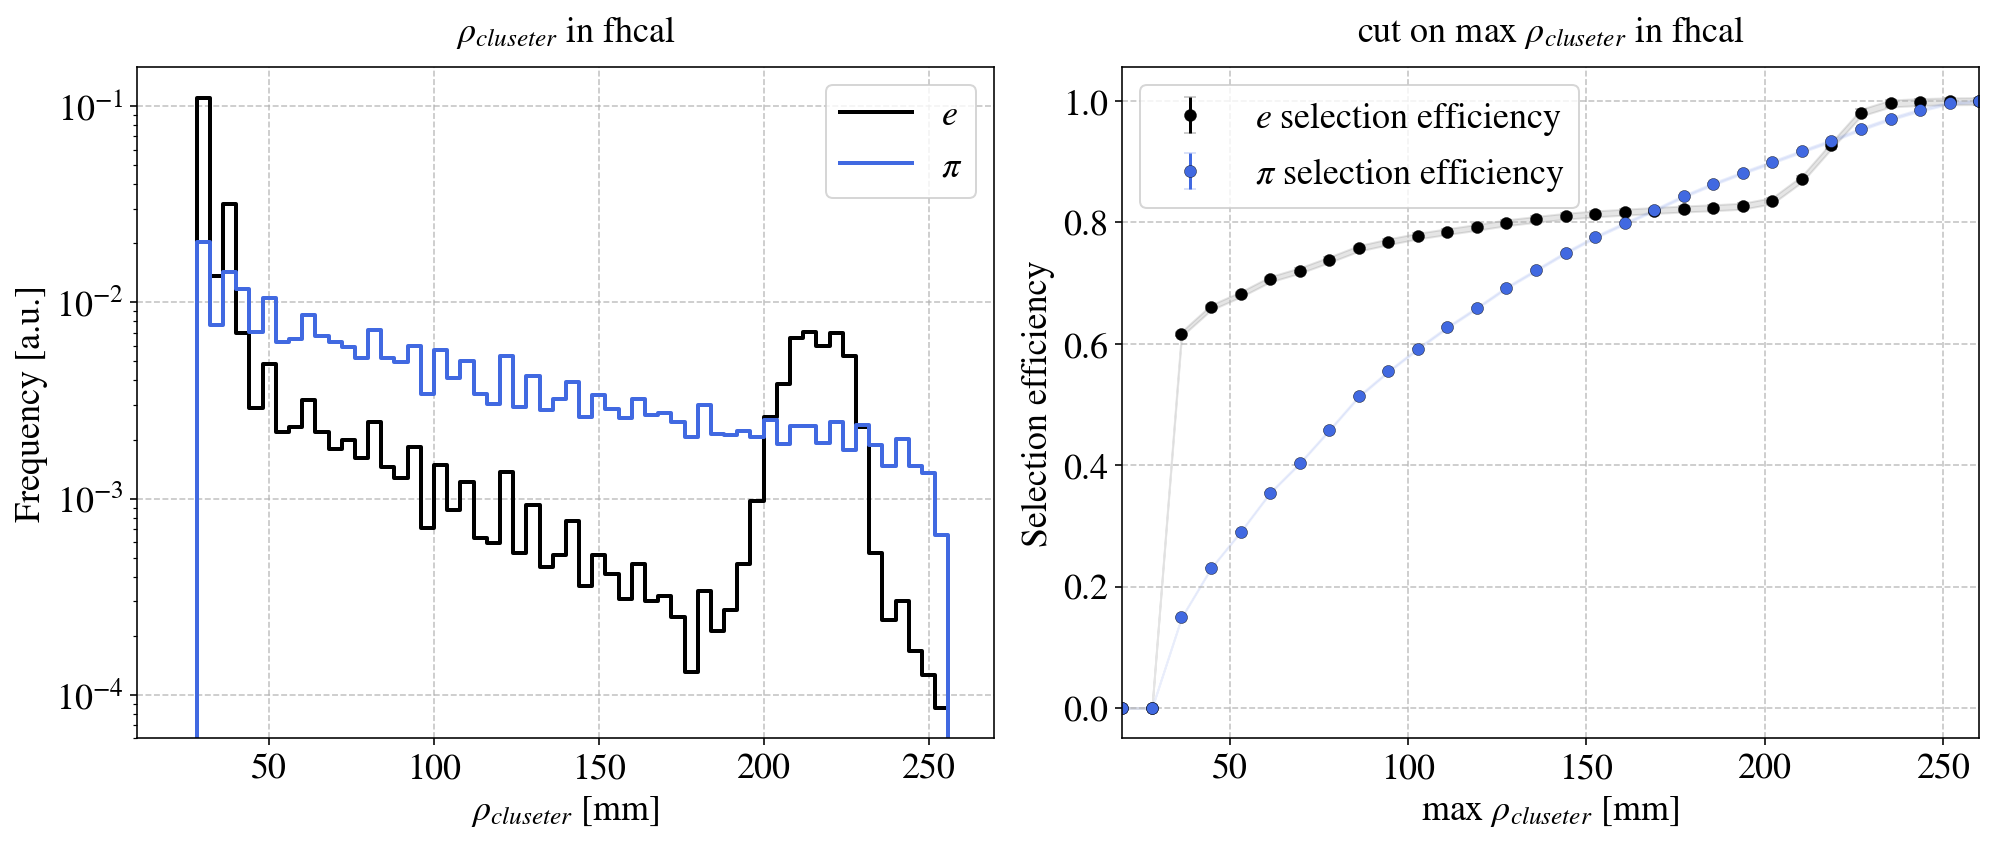

In [32]:
plot_1D_variable_and_cut(chainname='fhcal',chainlabel='fhcal',
                         variable='rho',varlabel='$\\rho_{cluseter}$',varunits='[mm]',
                         bins=np.linspace(20,260,61),xlim=(10,270),
                         cut_values=np.linspace(20.,260,30),min_or_max='max')

# $E/p$

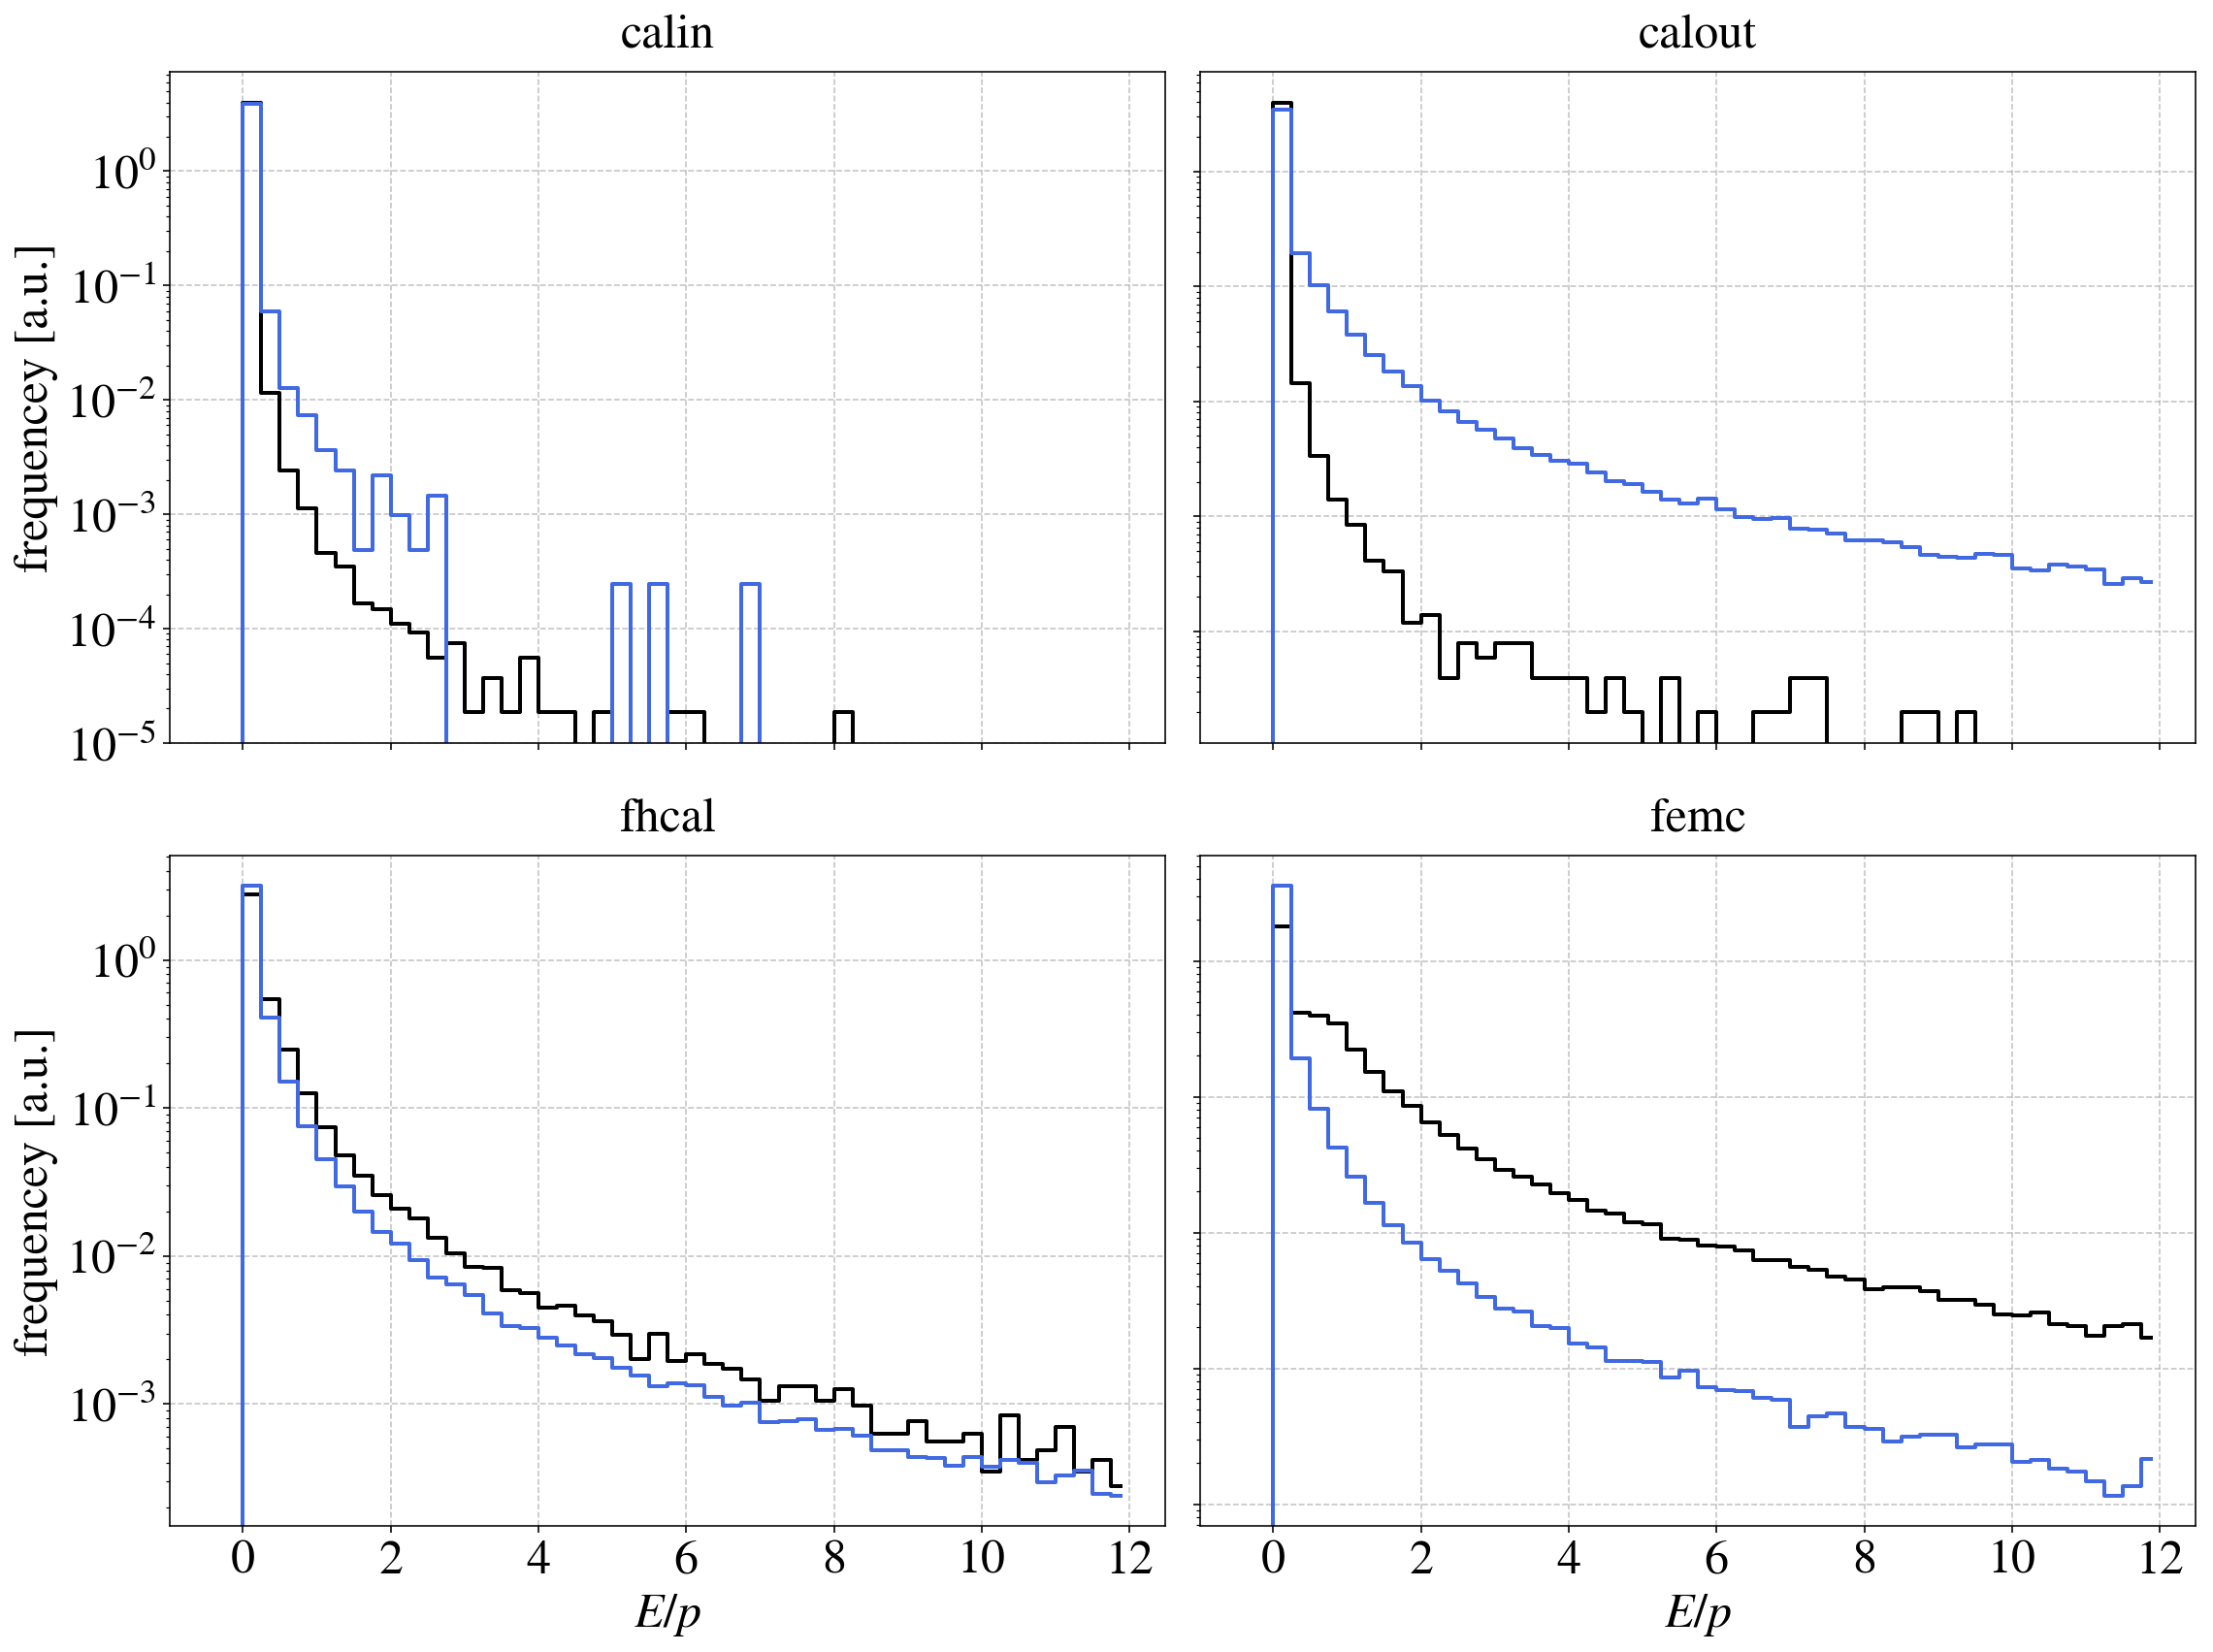

In [114]:
fig = plt.figure(figsize=(16,12))
for filelabel,chainlabel,axIdx in zip(['hcalin','hcalout','fhcal','femc'],
                                ['calin','calout','fhcal','femc'],[1,2,3,4]):
    ax = fig.add_subplot(2,2,axIdx)
    Plot_e_and_pi_distribtions(chainname=filelabel,chainlabel=chainlabel,
                               variable='E/p',varlabel='$E/p$',varunits='',
                               bins=np.linspace(-0.5,12.,51),
                               ax=ax, xticks=None, 
                               ylabel='Frequency [a.u.]', 
                               do_add_legend=False, yscale='log', fontsize=18,xlim=None)
    set_axes(ax,
             '$E/p$' if axIdx>2 else '',
             'frequencey [a.u.]' if axIdx%2==1 else '',
             title=chainlabel,
             remove_ticks_x=False if axIdx>2 else True,
             remove_ticks_y=True if axIdx%2==0 else False,
             do_add_grid = True, 
             do_add_legend = False)
plt.tight_layout()

### count how many events have E/p > 1

In [122]:
for filelabel,chainlabel in zip(['hcalin','hcalout','fhcal','femc'],
                                ['calin','calout','fhcal','femc']):
    e_EoverP  = np.array(elec_data[filelabel]['E/p'])
    N_e_EoverP_above_1 = len(e_EoverP[e_EoverP>1])
    f_e_EoverP_above_1 = float(N_e_EoverP_above_1) / len(e_EoverP)
    
    pi_EoverP = np.array(pion_data[filelabel]['E/p'])
    N_pi_EoverP_above_1 = len(pi_EoverP[pi_EoverP>1])    
    f_pi_EoverP_above_1 = float(N_pi_EoverP_above_1) / len(pi_EoverP)
    
    print 'in',chainlabel,'%.1f'%(100*f_e_EoverP_above_1),'% for electrons exceed 1','and %.1f'%(100*f_pi_EoverP_above_1),'% for pions'

in calin 0.0 % for electrons exceed 1 and 0.3 % for pions
in calout 0.1 % for electrons exceed 1 and 4.2 % for pions
in fhcal 7.8 % for electrons exceed 1 and 4.7 % for pions
in femc 25.5 % for electrons exceed 1 and 2.7 % for pions


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater
  


In [101]:
def plot_EoverP_vs_P(filelabel,bins=(np.linspace(0,22,50),np.linspace(0,0.03,50)),ylim = (0,0.03)):
    #  e_EoverP,e_P,pi_EoverP,pi_P,e_ax,pi_ax = plot_EoverP_vs_P(filelabel)
    
    e_EoverP,e_P   = np.array(elec_data[filelabel]['E/p']),np.array(elec_data[filelabel]['p'])
    pi_EoverP,pi_P = np.array(pion_data[filelabel]['E/p']),np.array(pion_data[filelabel]['p'])
    
    
    fig=plt.figure(figsize=(16,6))
    e_ax =fig.add_subplot(1,2,1) 
    plt.hist2d( e_P, e_EoverP, bins=bins, cmap='hot_r' );
    set_axes(e_ax,'$p$ [GeV]','$E/p$',title='electrons in ' +filelabel ,do_add_grid=True, ylim=ylim)

    pi_ax =fig.add_subplot(1,2,2) 
    plt.hist2d( pi_P, pi_EoverP, bins=bins, cmap='hot_r' );
    set_axes(pi_ax,'$p$ [GeV]','',title='pions in ' +filelabel ,do_add_grid=True, remove_ticks_y=True, ylim=ylim)

    plt.tight_layout()
    
    return e_EoverP,e_P,pi_EoverP,pi_P,e_ax,pi_ax

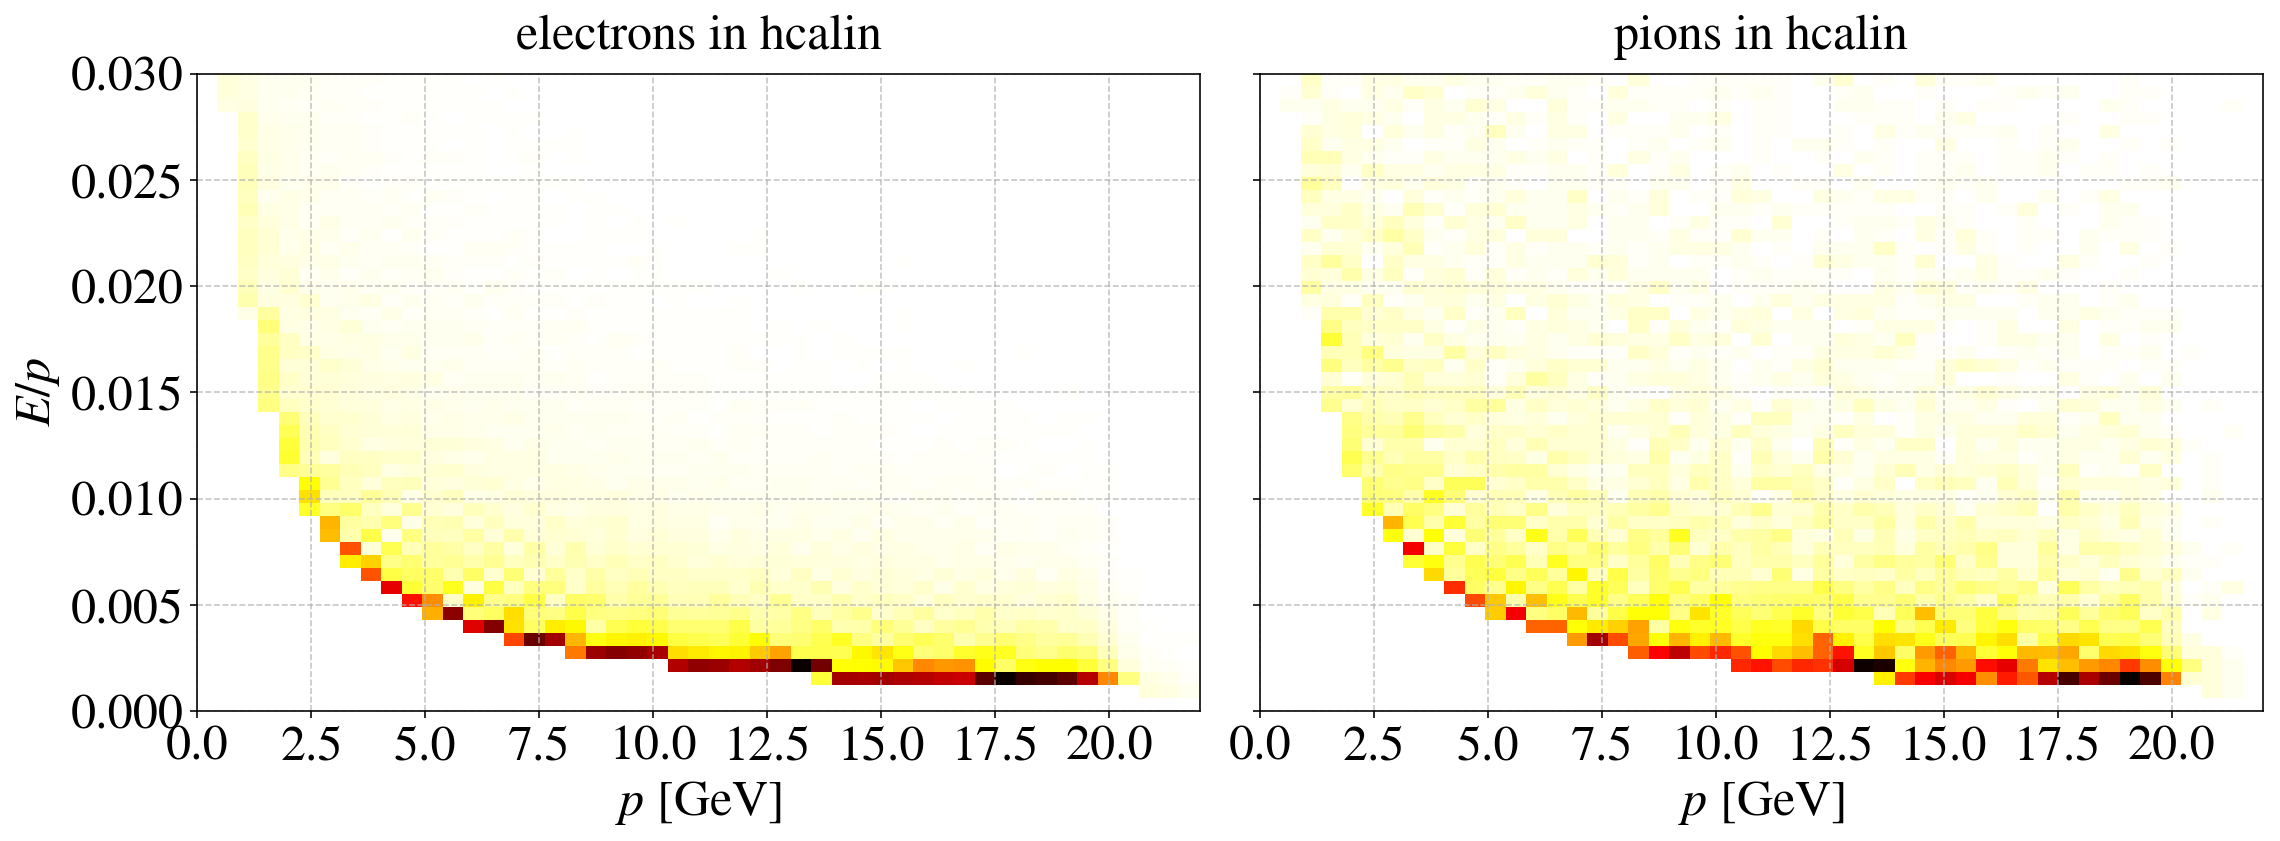

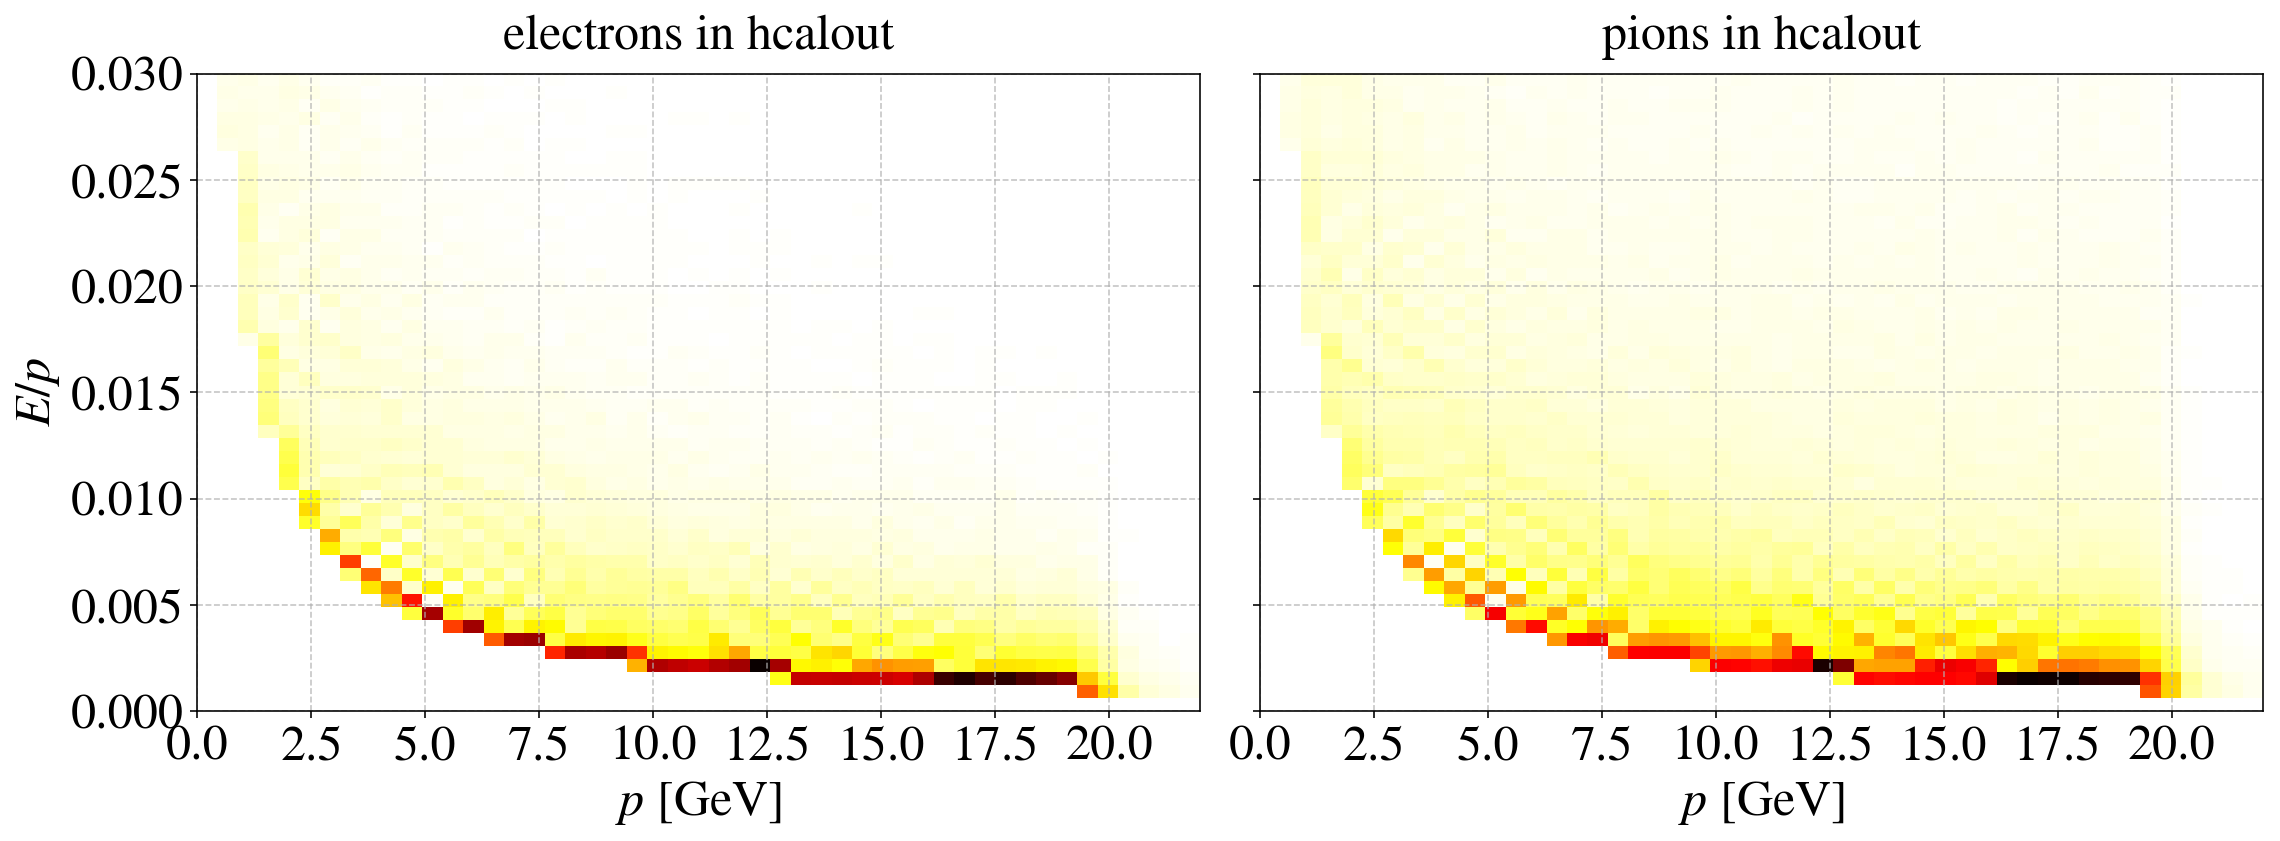

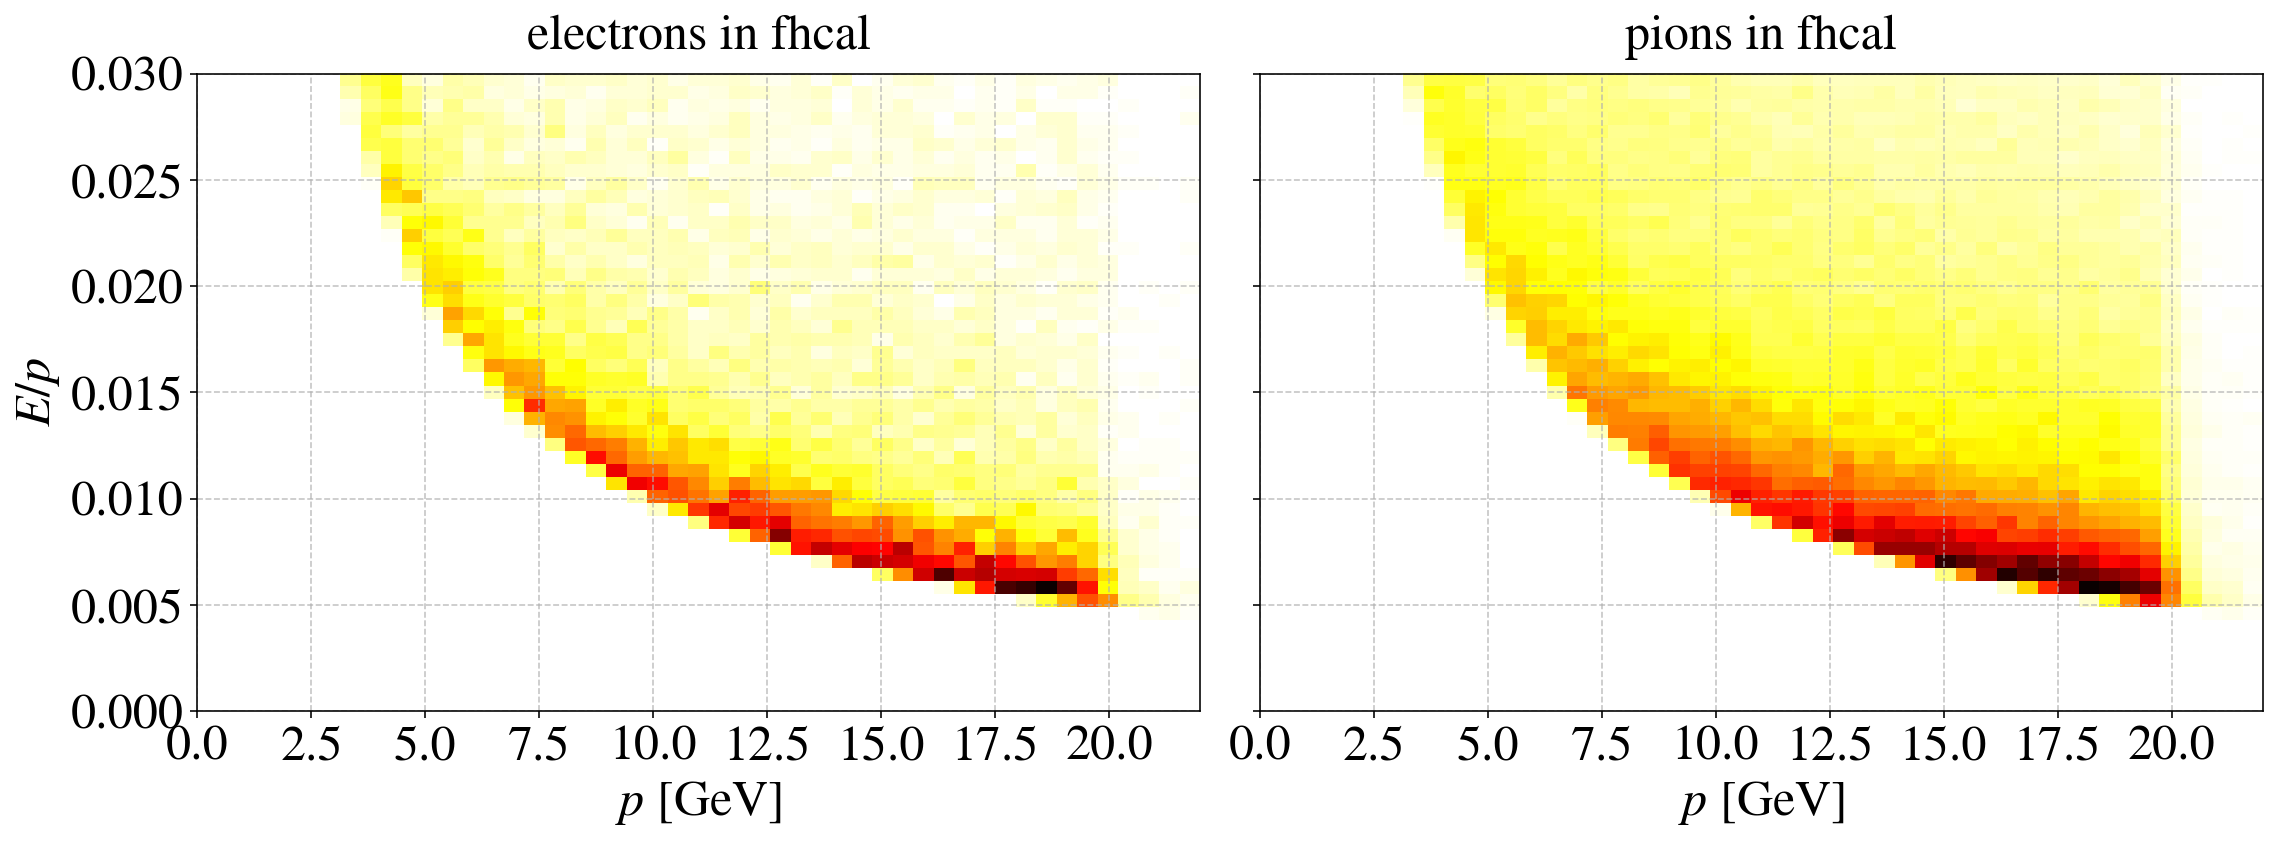

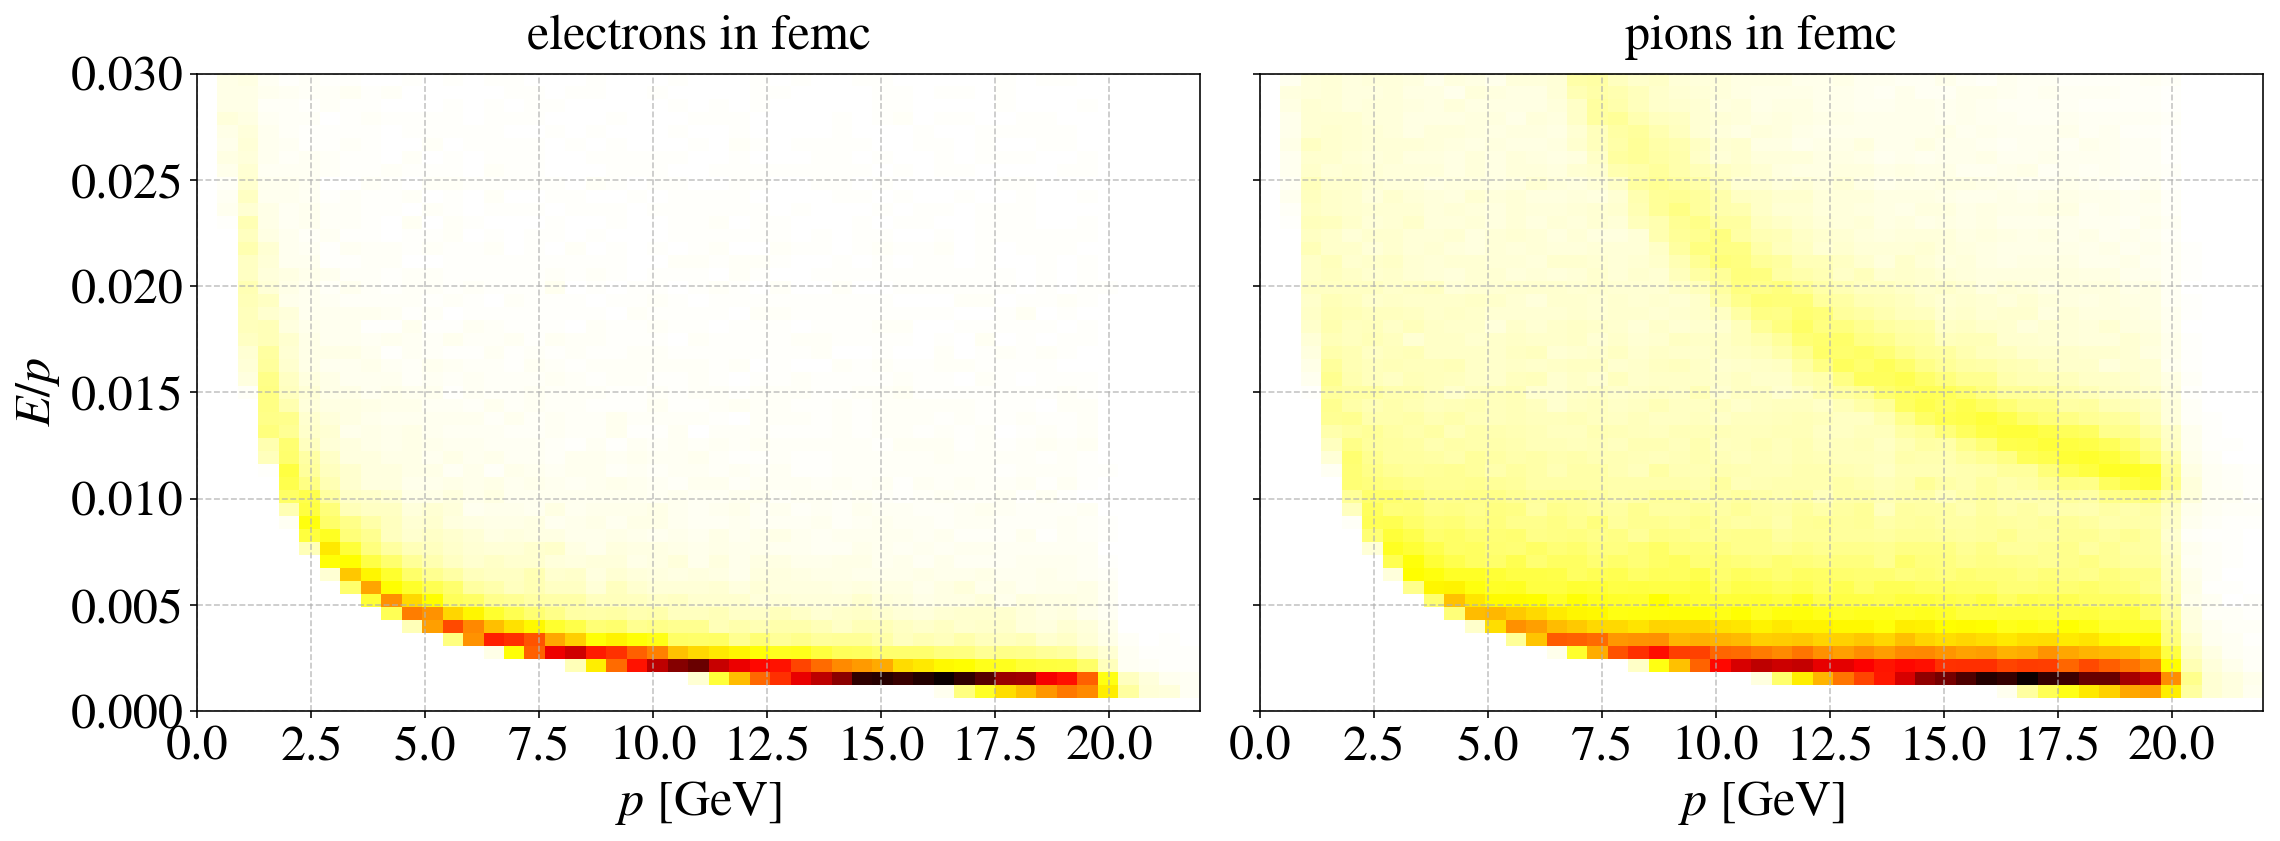

In [76]:
for filelabel in ['hcalin','hcalout','fhcal','femc']:
    plot_EoverP_vs_P(filelabel)

## cut on $E/p$?

In [95]:
def compute_selection_efficiency_EoverP_vs_P( df, EoverP0, P0, neg_power  ):
    '''    
    compute selection efficeincy for a cut on E/p
    cut_EoverP = EoverP0/np.power( cut_P-P0 , neg_power)
    '''    
    df_in_cut = df[ (df['p']<P0) | (df['E/p'] < (EoverP0/np.power( df['p']-P0 , neg_power)))]
    
    N_tot = float(len(df))
    N_in_cut = float(len(df_in_cut))    
    eff = N_in_cut/N_tot

    if N_in_cut:   eff_err= eff * np.sqrt( 1./N_in_cut + 1./N_tot ) 
    else: eff_err= 1./N_tot
        
    eff_err_dw = eff_err;
    eff_err_up = eff_err;
    
    if eff_err_dw > eff_err:   eff_err_dw = eff_err;
    if eff_err_up > 1-eff_err: eff_err_up = 1.-eff_err;
        
    return eff, eff_err_dw, eff_err_up    

In [96]:
def compute_selection_efficiencies_EoverP_vs_P( filelabel , EoverP0, P0, neg_power ):
    '''    
    compute selection efficeincies for e and pi for a cut on E/p
    cut_EoverP = EoverP0/np.power( cut_P-P0 , neg_power)
    '''
    e_eff, e_eff_err_dw, e_eff_err_up = compute_selection_efficiency_EoverP_vs_P( elec_data[filelabel],
                                                                                 EoverP0, 
                                                                                 P0, 
                                                                                 neg_power  );
    pi_eff, pi_eff_err_dw, pi_eff_err_up = compute_selection_efficiency_EoverP_vs_P( pion_data[filelabel],
                                                                                     EoverP0, 
                                                                                     P0, 
                                                                                     neg_power  );
    return e_eff, e_eff_err_dw, e_eff_err_up, pi_eff, pi_eff_err_dw, pi_eff_err_up
    

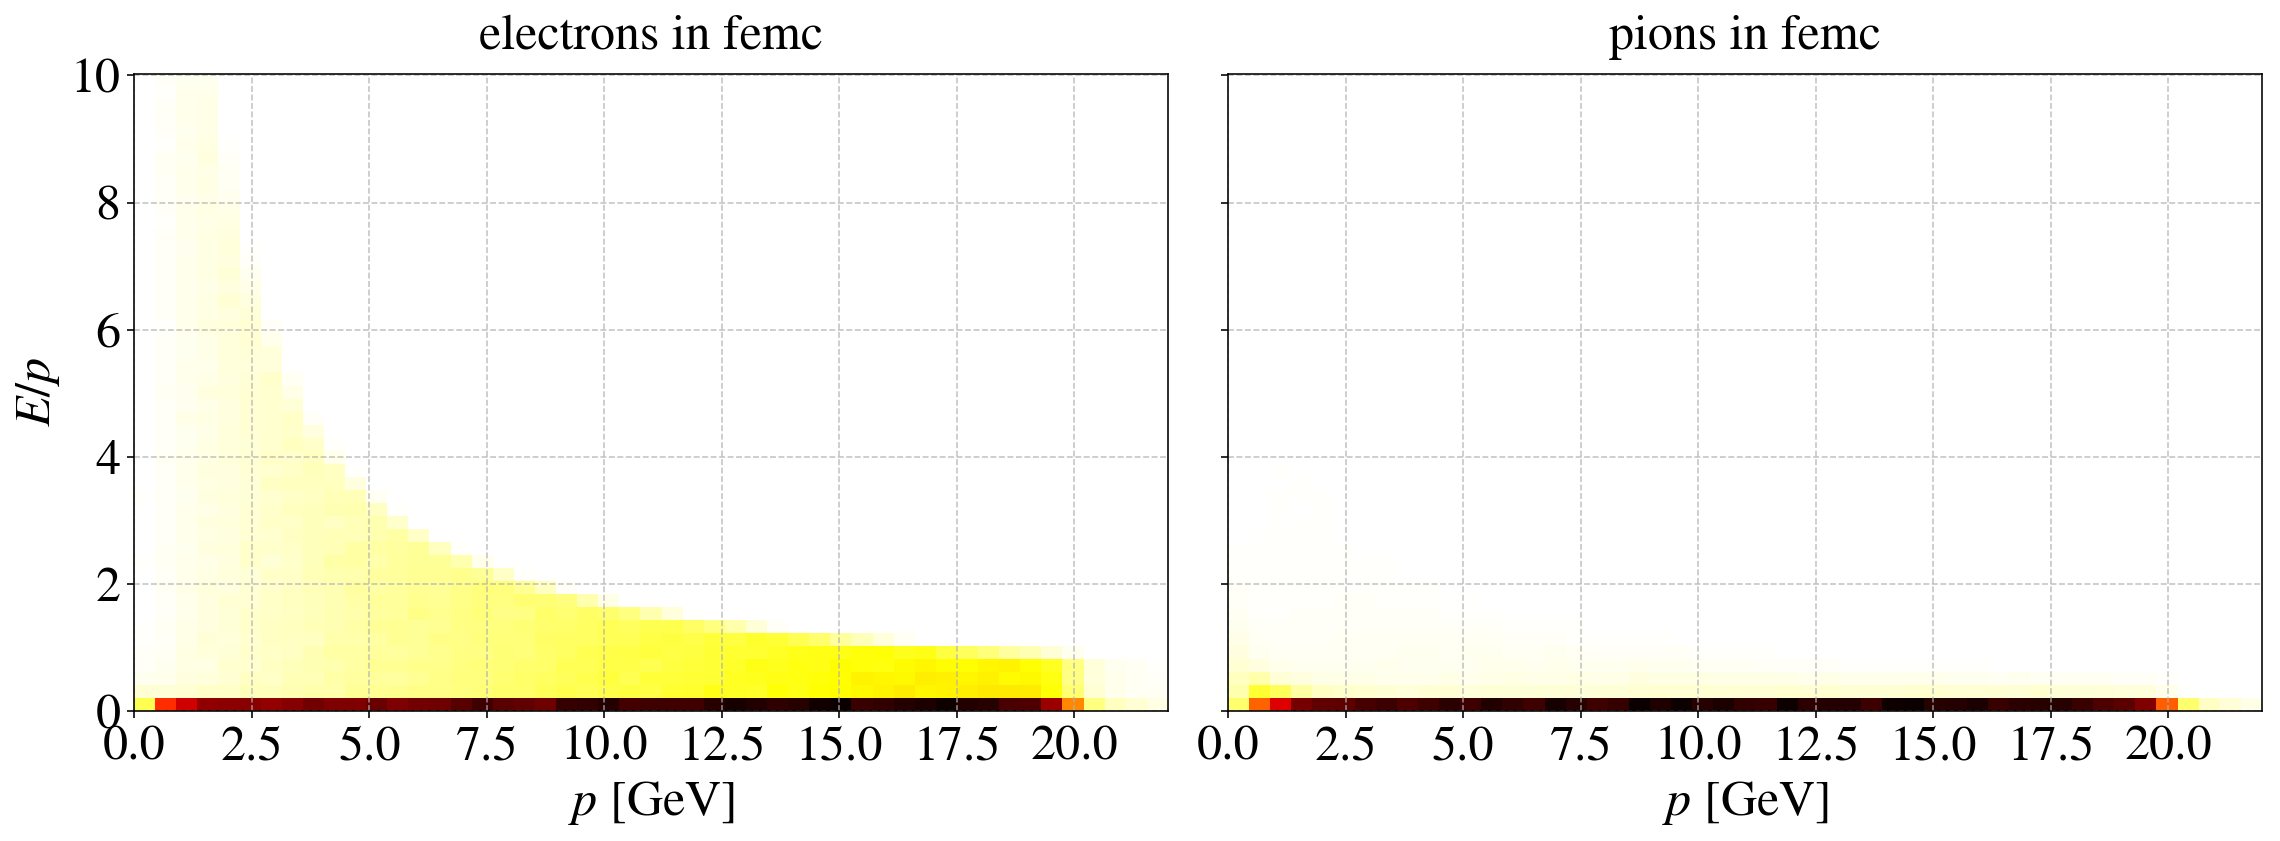

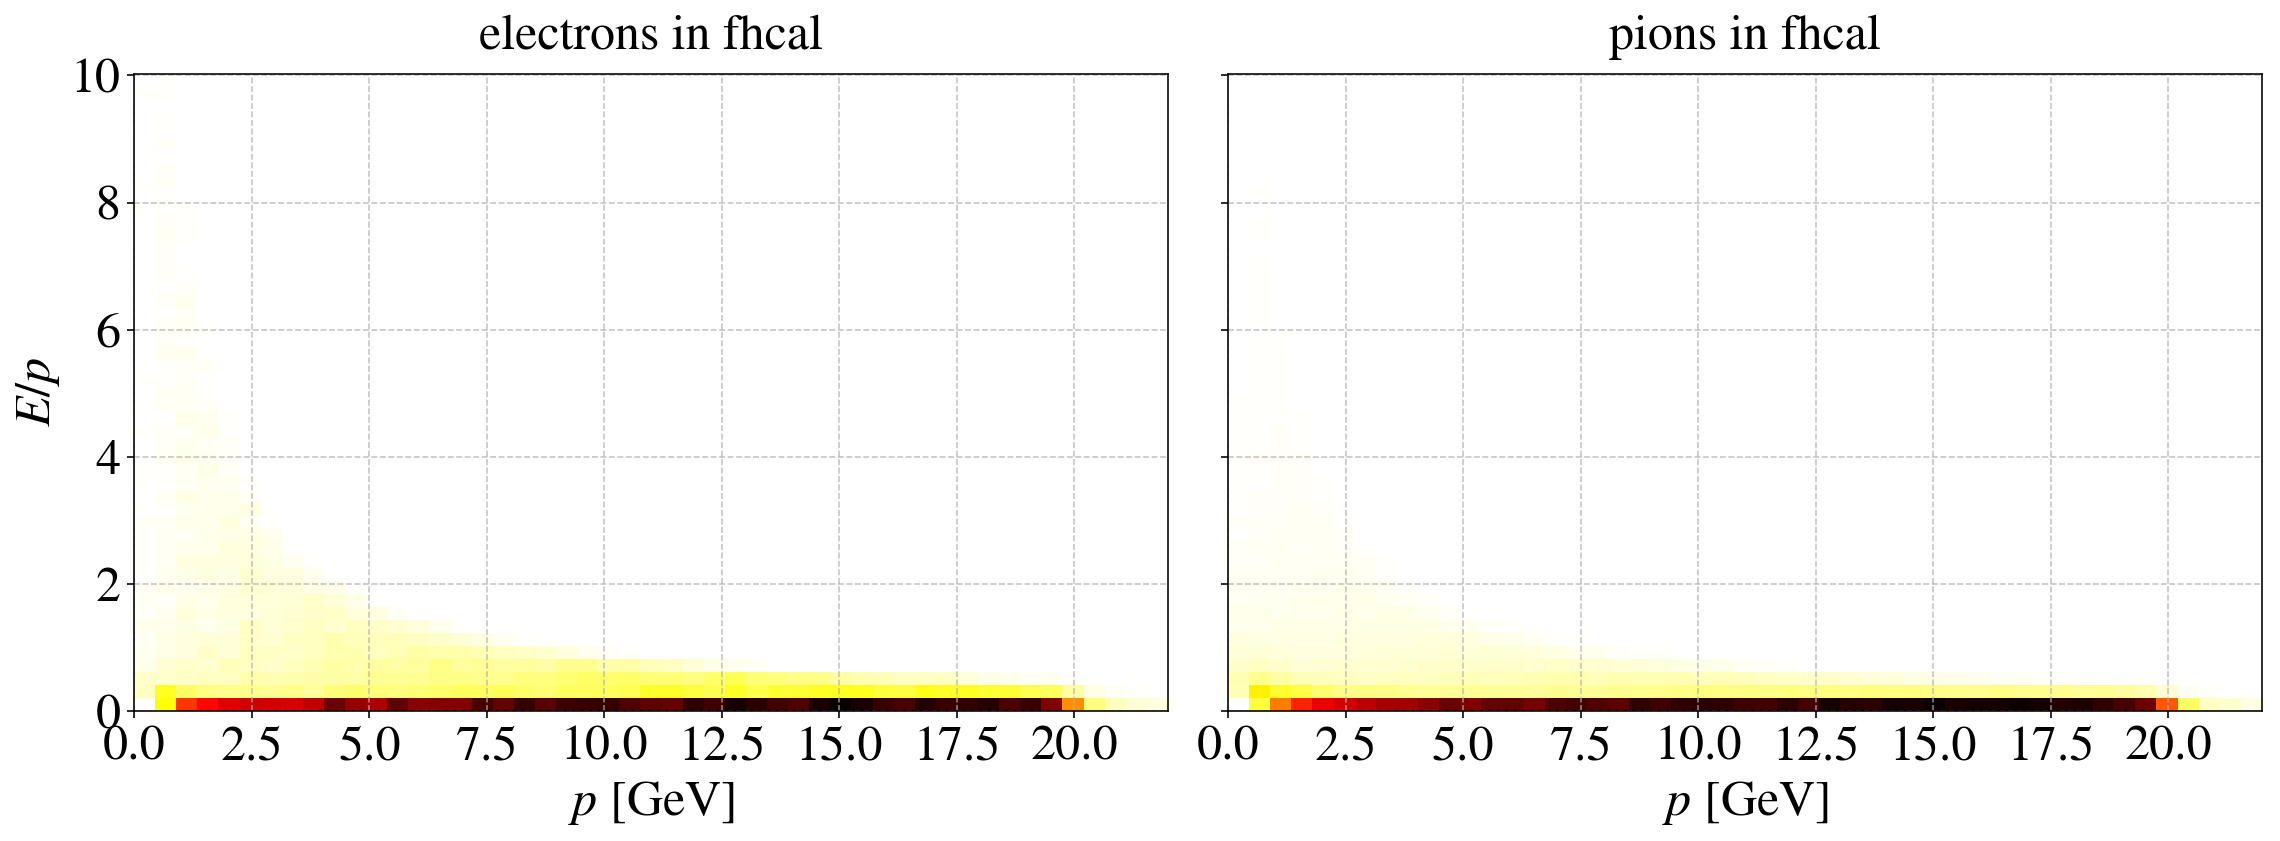

In [104]:
e_EoverP,e_P,pi_EoverP,pi_P,e_ax,pi_ax = plot_EoverP_vs_P("femc",
                                                          bins=(np.linspace(0,22,50),np.linspace(0,10.03,50)),
                                                          ylim = (0,10.03))

e_EoverP,e_P,pi_EoverP,pi_P,e_ax,pi_ax = plot_EoverP_vs_P("fhcal",
                                                          bins=(np.linspace(0,22,50),np.linspace(0,10.03,50)),
                                                          ylim = (0,10.03))

# EoverP0, P0, neg_power = 1.03, 1, 0.6


# cut_P = np.linspace(1,25,1000)
# cut_EoverP = EoverP0/np.power( cut_P-P0 , neg_power)

# [e_eff, 
#  e_eff_err_dw, 
#  e_eff_err_up, 
#  pi_eff, 
#  pi_eff_err_dw, 
#  pi_eff_err_up] = compute_selection_efficiencies_EoverP_vs_P( "femc" , EoverP0, P0, neg_power )



# e_ax.plot( cut_P , cut_EoverP , '-r');
# e_ax.set_title('selection efficinecy for $e = %.1f^{+%.1f}_{-%.1f}$'%(100*e_eff,100*e_eff_err_dw, 100*e_eff_err_up) + '%',fontsize=18)
# pi_ax.plot( cut_P , cut_EoverP , '-r');
# pi_ax.set_title('selection efficinecy for $\pi = %.1f^{+%.1f}_{-%.1f}$'%(100*pi_eff,100*pi_eff_err_dw, 100*pi_eff_err_up) + '%',fontsize=18);


# add rapidity to the game

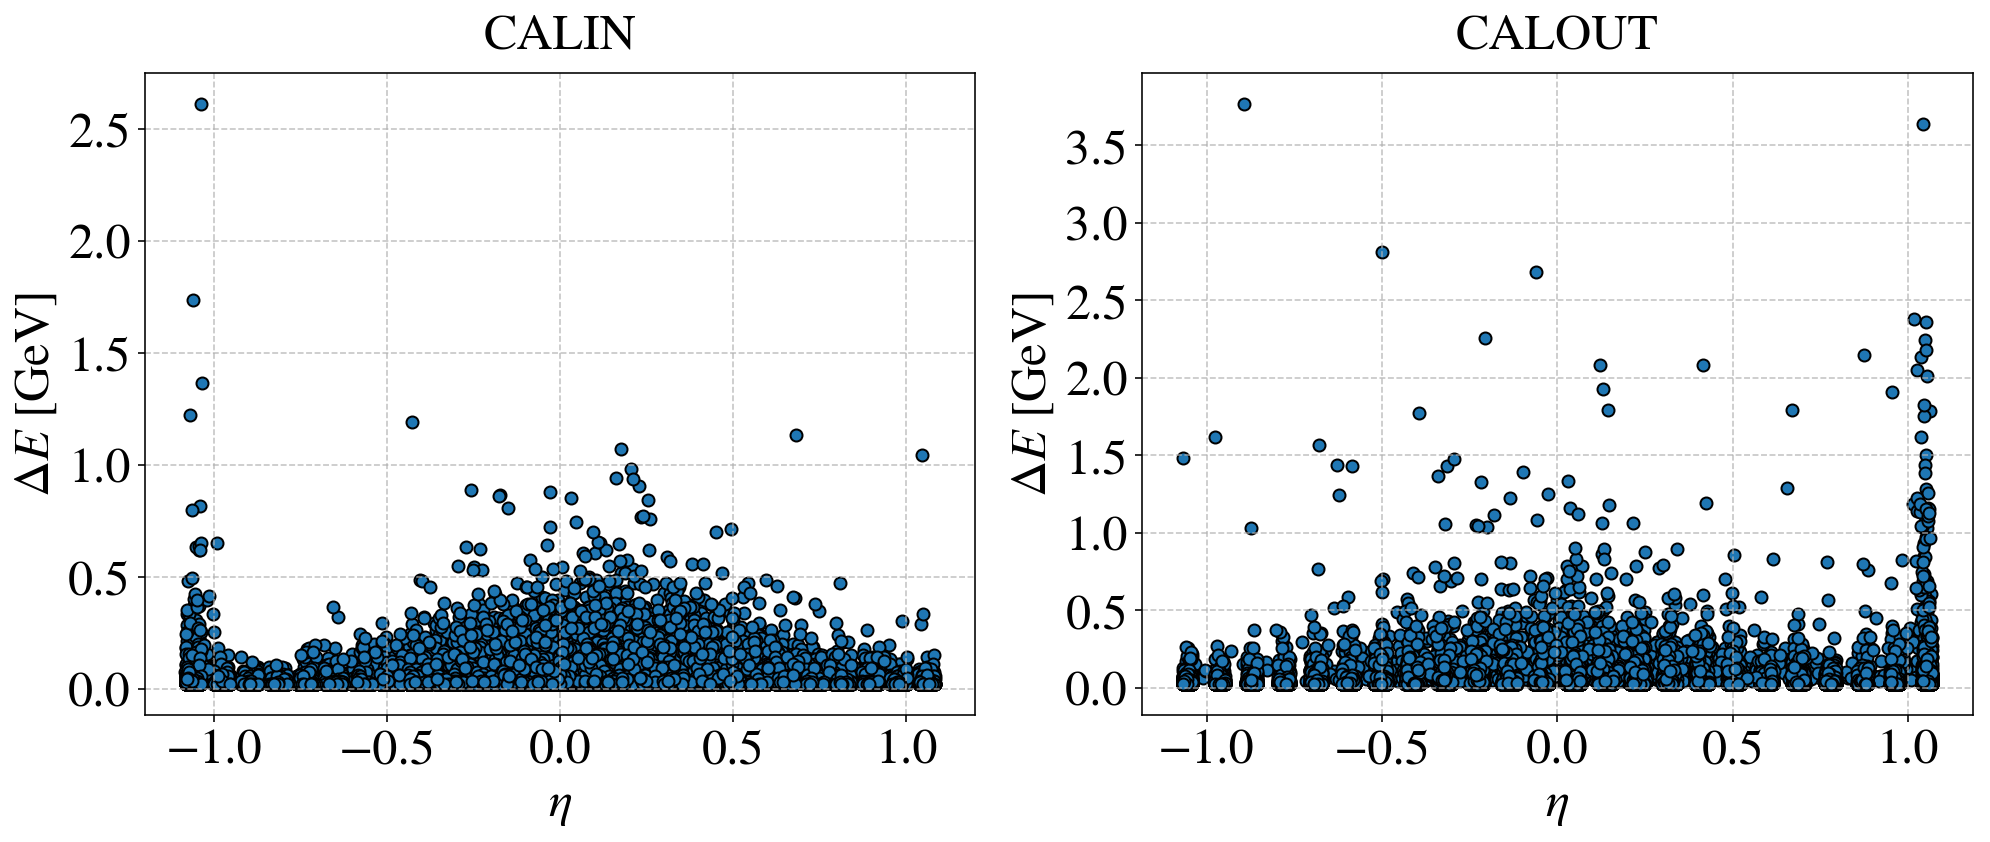

In [38]:
# eta_bins = np.linspace(-3,3,20) # GeV?
fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(1,2,1);
ax.scatter( e_calin.eta, e_calin.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALIN',do_add_grid=True)

ax = fig.add_subplot(1,2,2);
ax.scatter( e_calout.eta, e_calout.e,edgecolor='k');
set_axes(ax,'$\eta$','$\Delta E$ [GeV]',title='CALOUT',do_add_grid=True)

plt.tight_layout()